The Project will use NLP techniques to analyze the authours (John Mulaney is mentioned twice) of 15 Best Stand Up Comedy Specials (According To IMDb). The list is derived from https://screenrant.com/best-stand-up-comedy-specials-imdb/
The transcipts of these and other stand-up specials were derived from https://scrapsfromtheloft.com/stand-up-comedy-scripts/ using Requests and Beautiful Soup packages (there were no transcripts of James Acaster, as well as Robin Williams' "An Evening At The Met" and Dylan Moran's "Monster" although I derived other Robin Williams' and Dylan Moran's transcripts). The top 15 according to IMDb is as follows:
1. Dave Chappelle: Killin' Them Softly (8.8)
2. Bill Hicks: Relentless (8.7)
3. Eddie Izzard: Dress To Kill (8.7)
4. George Carlin... It's Bad For Ya! (8.6)
5. Louis C.K.: Chewed Up (8.6)
6. Bo Burnham: What. (8.5)
7. Dylan Moran: Monster (8.5) // no transcripts
8. James Acaster: Repertoire (8.4) // no transcripts
9. Robin Williams: An Evening At The Met (8.4) // no transcript
10. Bill Burr: I'm Sorry You Feel That Way (8.4)
11. John Mulaney: New In Town (8.3)
12. Richard Pryor: Live In Concert (8.2)
13. Eddie Murphy: Delirious (8.2)
14. Chris Rock: Bring The Pain (8.2)
15. John Mulaney: Kid Gorgeous At Radio City (8.0)

The overall number of specials analyzed was 12. Although I also make analysis of other monologues of the authors after analysing their top performances. The code used includes material covered in class and the code from https://github.com/nwams/nlp-stand-up-comedy , which uses similar techniques but on other data. Nevertheless, the webpage has changed, so I had to make some modifications

<span style="color:red">Disclaimer:</span> the dataset derived contains some direct and indirect references to potentially offensive language.

## Data Extraction

In [172]:
import requests
from bs4 import BeautifulSoup
import pickle


def url_to_transcript(url):
    page = requests.get(url).text 
    soup = BeautifulSoup(page, "lxml") 
    text = [p.text for p in soup.find(class_="site-content").find_all('p')] 
    print(url)
    return text

Initially, I wanted to analyze other monologues of the authors as well, therefore I put the urls of their other specials below:

In [173]:
urls = ['https://scrapsfromtheloft.com/comedy/john-mulaney-snl-monologue-2020-transcript/',
        'https://scrapsfromtheloft.com/comedy/john-mulaney-snl-monologue-2018-transcript/',
        'https://scrapsfromtheloft.com/comedy/john-mulaney-kid-gorgeous-at-radio-city-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/john-mulaney-new-in-town-2012-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/john-mulaney-comeback-kid-2015-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/chris-rock-snl-monologue-2020-transcript/',
        'https://scrapsfromtheloft.com/comedy/chris-rock-bring-pain-transcript/',
        'https://scrapsfromtheloft.com/comedy/chris-rock-tamborine-transcript/',
        'https://scrapsfromtheloft.com/comedy/chris-rock-never-scared-2004-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/chris-rock-kill-the-messenger-london-new-york-johannesburg-2008-movie-script/',
        'https://scrapsfromtheloft.com/comedy/chris-rock-bigger-blacker-1999-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/chris-rocks-monologue-saturday-night-live-1996/',
        'https://scrapsfromtheloft.com/comedy/eddie-murphy-raw-transcript/',
        'https://scrapsfromtheloft.com/comedy/eddie-murphy-delirious-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/richard-pryor-live-concert-1979-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/richard-pryor-live-sunset-strip-1982-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/richard-pryors-monologue-saturday-night-live-1975/',
        'https://scrapsfromtheloft.com/comedy/richard-pryor-live-and-smokin-1971-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/richard-pryor-here-and-now-1983/',
        'https://scrapsfromtheloft.com/comedy/bill-burr-snl-monologue-2020-transcript/',
        'https://scrapsfromtheloft.com/comedy/bill-burr-late-show-with-david-letterman-2010/',
        'https://scrapsfromtheloft.com/comedy/bill-burr-paper-tiger-transcript/',
        'https://scrapsfromtheloft.com/comedy/bill-burr-the-philadelphia-incident-2006-transcript/',
        'https://scrapsfromtheloft.com/comedy/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/bill-burr-people-2012-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/bill-burr-walk-way-2017-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/bill-burr-let-it-go-2010-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/robin-williams-weapons-of-self-destruction-transcript/',
        'https://scrapsfromtheloft.com/comedy/robin-williams-live-on-broadway-2002-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/dylan-moran-like-totally-2006-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/dylan-moran-off-the-hook-2015-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/bo-burnham-inside-transcript/',
        'https://scrapsfromtheloft.com/comedy/bo-burnham-words-words-words-transcript/',
        'https://scrapsfromtheloft.com/comedy/bo-burnham-what-transcript/',
        'https://scrapsfromtheloft.com/comedy/bo-burnham-make-happy-2016-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/louis-c-k-sorry-transcript/',
        'https://scrapsfromtheloft.com/comedy/louis-ck-snl-monologue-s38e06-2012-transcript/',
        'https://scrapsfromtheloft.com/comedy/louis-c-k-snl-monologue-march-29-2014-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/louis-c-k-snl-monologue-2015-transcript/',
        'https://scrapsfromtheloft.com/comedy/louis-c-k-chewed-2008-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/louis-c-k-live-at-the-beacon-theatre-2011-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/louis-c-k-hilarious-2010-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/louis-c-k-shameless-2007-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/louis-ck-oh-my-god-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/louis-c-k-live-at-the-comedy-store-2015-transcript/',
        'https://scrapsfromtheloft.com/comedy/louis-c-k-2017-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-politically-correct-language/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-doin-it-again-transcript/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-indian-drill-sergeant-transcript/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-dumb-americans-transcript/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-what-am-i-doing-in-new-jersey-transcript/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-saturday-night-live-monologue1975-s01e01/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-you-are-all-diseased-transcript/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-pro-life-abortion-and-the-sanctity-of-life/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-religion-is-bullshit/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-at-usc-1977-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-playing-head-1986-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-1978-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-carlin-campus-1984-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-seven-words-you-can-never-say-on-television/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-back-town-1996-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-jamming-new-york-1992-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-complaints-grievances/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-life-is-worth-losing-transcript/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-its-bad-for-ya/',
        'https://scrapsfromtheloft.com/comedy/eddie-izzard-glorious-1997-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/eddie-izzard-stripped-2009-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/eddie-izzard-unrepeatable-transcript/',
        'https://scrapsfromtheloft.com/comedy/eddie-izzard-dress-kill-1999-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/bill-hicks-censored-david-letterman-transcript/',
        'https://scrapsfromtheloft.com/comedy/bill-hicks-live-at-laff-stop-austin-tx-and-cobbs-san-francisco-ca-1993/',
        'https://scrapsfromtheloft.com/comedy/bill-hicks-revelations-1993-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/bill-hicks-relentless-1992-transcript/',
        'https://scrapsfromtheloft.com/comedy/dave-chappelle-the-closer-transcript/',
        'https://scrapsfromtheloft.com/comedy/dave-chappelle-846-transcript/',
        'https://scrapsfromtheloft.com/comedy/dave-chappelle-snl-monologue-2020-transcript/',
        'https://scrapsfromtheloft.com/comedy/dave-chappelle-hbo-comedy-half-hour-1998-transcript/',
        'https://scrapsfromtheloft.com/comedy/dave-chappelle-acceptance-speech-2019-mark-twain-prize/',
        'https://scrapsfromtheloft.com/comedy/dave-chappelle-sticks-stones-transcript/',
        'https://scrapsfromtheloft.com/comedy/dave-chappelle-the-bird-revelation-2017-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/dave-chappelle-equanimity-2017-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/dave-chappelle-worth-2004-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/dave-chappelle-killin-softly-2000-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/dave-chappelle-deep-heart-texas-2017-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/dave-chappelle-age-spin-2017-full-transcript/'
       ]



In [174]:
special=[]
for a in urls:
    c=a.replace('https://scrapsfromtheloft.com/comedy/', '').replace('/', '').replace('-transcript','').replace('-full','')
    special.append(c)
special

['john-mulaney-snl-monologue-2020',
 'john-mulaney-snl-monologue-2018',
 'john-mulaney-kid-gorgeous-at-radio-city',
 'john-mulaney-new-in-town-2012',
 'john-mulaney-comeback-kid-2015',
 'chris-rock-snl-monologue-2020',
 'chris-rock-bring-pain',
 'chris-rock-tamborine',
 'chris-rock-never-scared-2004',
 'chris-rock-kill-the-messenger-london-new-york-johannesburg-2008-movie-script',
 'chris-rock-bigger-blacker-1999',
 'chris-rocks-monologue-saturday-night-live-1996',
 'eddie-murphy-raw',
 'eddie-murphy-delirious',
 'richard-pryor-live-concert-1979',
 'richard-pryor-live-sunset-strip-1982',
 'richard-pryors-monologue-saturday-night-live-1975',
 'richard-pryor-live-and-smokin-1971',
 'richard-pryor-here-and-now-1983',
 'bill-burr-snl-monologue-2020',
 'bill-burr-late-show-with-david-letterman-2010',
 'bill-burr-paper-tiger',
 'bill-burr-the-philadelphia-incident-2006',
 'bill-burr-im-sorry-feel-way-2014',
 'bill-burr-people-2012',
 'bill-burr-walk-way-2017',
 'bill-burr-let-it-go-2010',
 '

In [175]:
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/comedy/john-mulaney-snl-monologue-2020-transcript/
https://scrapsfromtheloft.com/comedy/john-mulaney-snl-monologue-2018-transcript/
https://scrapsfromtheloft.com/comedy/john-mulaney-kid-gorgeous-at-radio-city-full-transcript/
https://scrapsfromtheloft.com/comedy/john-mulaney-new-in-town-2012-full-transcript/
https://scrapsfromtheloft.com/comedy/john-mulaney-comeback-kid-2015-full-transcript/
https://scrapsfromtheloft.com/comedy/chris-rock-snl-monologue-2020-transcript/
https://scrapsfromtheloft.com/comedy/chris-rock-bring-pain-transcript/
https://scrapsfromtheloft.com/comedy/chris-rock-tamborine-transcript/
https://scrapsfromtheloft.com/comedy/chris-rock-never-scared-2004-full-transcript/
https://scrapsfromtheloft.com/comedy/chris-rock-kill-the-messenger-london-new-york-johannesburg-2008-movie-script/
https://scrapsfromtheloft.com/comedy/chris-rock-bigger-blacker-1999-full-transcript/
https://scrapsfromtheloft.com/comedy/chris-rocks-monologue-saturday-nigh

In [176]:
len(transcripts)

85

In [177]:
len(special)

85

In [178]:
pwd

'C:\\Users\\molda'

In [179]:
!mkdir transcripts # anything after ! will be executed by the system command-line (not by the Python kernel) 

for i, c in enumerate(special):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

A subdirectory or file transcripts already exists.
Error occurred while processing: transcripts.
A subdirectory or file # already exists.
Error occurred while processing: #.
A subdirectory or file anything already exists.
Error occurred while processing: anything.
A subdirectory or file after already exists.
Error occurred while processing: after.
A subdirectory or file ! already exists.
Error occurred while processing: !.
A subdirectory or file will already exists.
Error occurred while processing: will.
A subdirectory or file be already exists.
Error occurred while processing: be.
A subdirectory or file executed already exists.
Error occurred while processing: executed.
A subdirectory or file by already exists.
Error occurred while processing: by.
A subdirectory or file the already exists.
Error occurred while processing: the.
A subdirectory or file system already exists.
Error occurred while processing: system.
A subdirectory or file command-line already exists.
Error occurred while 

In [180]:
data = {}
for i, c in enumerate(special):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

Next I am marking the those in top15:

In [181]:
special_with_top= special

In [182]:
special_with_top[2]='top15 :'+special[2]
special_with_top[6]='top14 :'+special[6]
special_with_top[13]='top13 :'+special[13]
special_with_top[14]='top12 :'+special[14]
special_with_top[3]='top11 :'+special[3]
special_with_top[23]='top10 :'+special[23]
special_with_top[33]='top06 :'+special[33]
special_with_top[39]='top05 :'+special[39]
special_with_top[64]='top04 :'+special[64]
special_with_top[68]='top03 :'+special[68]
special_with_top[72]='top02 :'+special[72]
special_with_top[82]='top01 :'+special[82]

print(special_with_top[2])
print(special_with_top[6])
print(special_with_top[13])
print(special_with_top[14])
print(special_with_top[3])
print(special_with_top[23])
print(special_with_top[33])
print(special_with_top[39])
print(special_with_top[64])
print(special_with_top[68])
print(special_with_top[72])
print(special_with_top[82])

top15 :john-mulaney-kid-gorgeous-at-radio-city
top14 :chris-rock-bring-pain
top13 :eddie-murphy-delirious
top12 :richard-pryor-live-concert-1979
top11 :john-mulaney-new-in-town-2012
top10 :bill-burr-im-sorry-feel-way-2014
top06 :bo-burnham-what
top05 :louis-c-k-chewed-2008
top04 :george-carlin-its-bad-for-ya
top03 :eddie-izzard-dress-kill-1999
top02 :bill-hicks-relentless-1992
top01 :dave-chappelle-killin-softly-2000


In [183]:
special_with_top

['john-mulaney-snl-monologue-2020',
 'john-mulaney-snl-monologue-2018',
 'top15 :john-mulaney-kid-gorgeous-at-radio-city',
 'top11 :john-mulaney-new-in-town-2012',
 'john-mulaney-comeback-kid-2015',
 'chris-rock-snl-monologue-2020',
 'top14 :chris-rock-bring-pain',
 'chris-rock-tamborine',
 'chris-rock-never-scared-2004',
 'chris-rock-kill-the-messenger-london-new-york-johannesburg-2008-movie-script',
 'chris-rock-bigger-blacker-1999',
 'chris-rocks-monologue-saturday-night-live-1996',
 'eddie-murphy-raw',
 'top13 :eddie-murphy-delirious',
 'top12 :richard-pryor-live-concert-1979',
 'richard-pryor-live-sunset-strip-1982',
 'richard-pryors-monologue-saturday-night-live-1975',
 'richard-pryor-live-and-smokin-1971',
 'richard-pryor-here-and-now-1983',
 'bill-burr-snl-monologue-2020',
 'bill-burr-late-show-with-david-letterman-2010',
 'bill-burr-paper-tiger',
 'bill-burr-the-philadelphia-incident-2006',
 'top10 :bill-burr-im-sorry-feel-way-2014',
 'bill-burr-people-2012',
 'bill-burr-walk-

In [184]:
data = {}
for i, c in enumerate(special_with_top):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [185]:
data.keys()

dict_keys(['john-mulaney-snl-monologue-2020', 'john-mulaney-snl-monologue-2018', 'top15 :john-mulaney-kid-gorgeous-at-radio-city', 'top11 :john-mulaney-new-in-town-2012', 'john-mulaney-comeback-kid-2015', 'chris-rock-snl-monologue-2020', 'top14 :chris-rock-bring-pain', 'chris-rock-tamborine', 'chris-rock-never-scared-2004', 'chris-rock-kill-the-messenger-london-new-york-johannesburg-2008-movie-script', 'chris-rock-bigger-blacker-1999', 'chris-rocks-monologue-saturday-night-live-1996', 'eddie-murphy-raw', 'top13 :eddie-murphy-delirious', 'top12 :richard-pryor-live-concert-1979', 'richard-pryor-live-sunset-strip-1982', 'richard-pryors-monologue-saturday-night-live-1975', 'richard-pryor-live-and-smokin-1971', 'richard-pryor-here-and-now-1983', 'bill-burr-snl-monologue-2020', 'bill-burr-late-show-with-david-letterman-2010', 'bill-burr-paper-tiger', 'bill-burr-the-philadelphia-incident-2006', 'top10 :bill-burr-im-sorry-feel-way-2014', 'bill-burr-people-2012', 'bill-burr-walk-way-2017', 'bil

In [186]:
data['bill-burr-snl-monologue-2020']

['Original air date: October 10, 2020',
 'Host Bill Burr does stand-up about the COVID-19 pandemic, cancel culture and white women.',
 '\xa0',
 '\xa0',
 'Ladies and gentlemen, Bill Burr!',
 '[Cheers and applause]',
 '♪',
 'Thank you, thank you so much. Thank you. I am so — I am so excited to be here I have been doing standup forever, and this has always been a lifelong dream of mine to come and host “Saturday Night Live. So thank you so much for coming out… [Cheers and applause] …coming out during these difficult times. You got to look like surgeons with your masks on, makes me feel comfortable that you’re wearing masks I like people who wear masks that’s good. You’re listening to the eggheads, the people we all cheated off of in high school, right? Keep listening to them and then if you don’t wear a mask, that doesn’t bug me either, right? Take out your grand parents. You know, take out your weak cousin with the asthma, I don’t care, it’s your decision, there’s too many people. It’s a

In [187]:
data['top01 :dave-chappelle-killin-softly-2000'][-7]

'E-mail*'

In [188]:
data['top01 :dave-chappelle-killin-softly-2000'][-10]

'All right, guys, thank you very much. Thank you all. Good night. Woo! Ya’ll gone make me lose my mind. Up in here! Up in here! Good night. Good night! Up in here! Up in here! Y’all gone make me act a fool. Up in here! Up in here! Y’all gone make me lose my cool. Up in here! Up in here!'

In [189]:
data['louis-c-k-shameless-2007'][:2]

['Please welcome Louis C.K.! Thank you. Thank you. Thank you. Thank you, thanks, that’s very nice. Hello, everybody. How are ya? Woo! Good, thanks for- thank you, oh, good. Thanks, thanks for coming, thanks for being here. Thanks for not dying before you got here. Which could’ve happened. – Thanks for getting through the traffic. I drove here, and on the way here I saw a bumper sticker on a car, and it said, uh, it said “tell your girlfriend I said thanks.” isn’t that a little personal for a bumper sticker, really? A bumper sticker should be like, “hey, I’m in front of you, buh-baa,” whatever, you know. Not, “hey, I fucked your girlfriend.” You really want that on your car all day for whoever’s behind you? “tell your girlfriend I said thanks,” how does he know I’m not behind him just getting mad, and… Crazy, taking it personal, “motherfucker… ” I follow him home, I get out of my car in his driveway with a pipe, “what the fuck does that mean?” thank her for what, exactly? – wait a minut

## Text Preprocessing


In [190]:
data['bill-burr-snl-monologue-2020']

['Original air date: October 10, 2020',
 'Host Bill Burr does stand-up about the COVID-19 pandemic, cancel culture and white women.',
 '\xa0',
 '\xa0',
 'Ladies and gentlemen, Bill Burr!',
 '[Cheers and applause]',
 '♪',
 'Thank you, thank you so much. Thank you. I am so — I am so excited to be here I have been doing standup forever, and this has always been a lifelong dream of mine to come and host “Saturday Night Live. So thank you so much for coming out… [Cheers and applause] …coming out during these difficult times. You got to look like surgeons with your masks on, makes me feel comfortable that you’re wearing masks I like people who wear masks that’s good. You’re listening to the eggheads, the people we all cheated off of in high school, right? Keep listening to them and then if you don’t wear a mask, that doesn’t bug me either, right? Take out your grand parents. You know, take out your weak cousin with the asthma, I don’t care, it’s your decision, there’s too many people. It’s a

In [191]:
data

{'john-mulaney-snl-monologue-2020': ['Original air date: October 31, 2020',
  'John Mulaney talks about New York Governor Andrew Cuomo’s coronavirus briefings, the 2020 election and his grandmother.',
  '\xa0',
  '\xa0',
  'Ladies and gentlemen, John Mulaney!',
  '[Cheers and applause]',
  '♪♪♪',
  'Thank you! Thank you! Thank you very much. It is great to be here hosting “Saturday Night Live” for the fourth time. [Cheers and applause] It’s the most anyone’s ever hosted. [Laughter] Happy Halloween to all of you and thank you for coming to this, thank you for everyone here who did so much work to make something happen, because nothing had been happening for so long. We all really appreciate it. My name is John Mulaney. I am a comedian, or as I like to call us, the last responders. [Laughter] I live in New York City, I love New York City, I love that you’re all wearing masks. I’m a little sad about masks in New York City because it prevents you from overhearing conversations on the stree

In [192]:
for i in data:
    print(data[i][-9])

Your email address will not be published. Required fields are marked *
Your email address will not be published. Required fields are marked *
Your email address will not be published. Required fields are marked *
Your email address will not be published. Required fields are marked *
Your email address will not be published. Required fields are marked *
Your email address will not be published. Required fields are marked *
Your email address will not be published. Required fields are marked *
Your email address will not be published. Required fields are marked *
Your email address will not be published. Required fields are marked *
Your email address will not be published. Required fields are marked *
Your email address will not be published. Required fields are marked *
Your email address will not be published. Required fields are marked *
Your email address will not be published. Required fields are marked *
Your email address will not be published. Required fields are marked *
Your e

In the list 'data' items starting from data[-9] are not a part of the original script. So they can be removed:

In [193]:
for i in data:
    for x in range(9):
        data[i].pop()

In [194]:
for i in data:
    print(data[i][-1])

Stick around. We’re going to be right back.
[Cheers and applause] ♪♪♪
You don’t.
Hey! I was just wondering what the isbn number of this piece was?
Good night, Chicago.
[Cheers and applause]
Thanks! Thank you! Thanks!
I always enjoy Chris Rock comedic genius woven into real life truth!
Yo, marriage is tough, man. Marriage is real fucking tough. Marriage is so tough, Nelson Mandela got a divorce. Nelson Mandela got a fucking divorce. Nelson Mandela spent 27 years in a South African prison, got beaten and tortured every day for 27 years, and did it with no fucking problems. Made to do hard labour in 100-degree South African heat for 27 years, and did it with no problems. He got out of jail, after 27 years of torture, spent six months with his wife and said, “I can’t take this shit no more!” I’m outta here. Y’all take care. Thank you! Best show ever. It was hilarious. Once you get married, life is over. No more blow jobs! I’m telling you, don’t get married. I’ll come and see him again. My 

In [195]:
for i in data:
    print(data[i][0])

Original air date: October 31, 2020
Original air date: April 14, 2018
[organ music playing]
[funky 90’s beat and cityscape pan]
Armed with boyish charm and a sharp wit, the former “SNL” writer John Mulaney offers sly takes on marriage, his beef with babies and the time he met Bill Clinton
Original air date: October 10, 2020
[Announcer] Live from the Takoma Theatre in Washington D.C. Are you ready? I said, are you ready? It’s time to bring the pain, give it to me for Mr. Chris Rock!
[indistinct overlapping chatter]
Chris Rock pulls out all the stops in his no-holds-barred stand up comedy special which aired in April 2004 on HBO. Gleefully making fun of rap music over the years, the Jacksons, Kobe Bryant, R. Kelly, Krispy Kremes, strippers “paying themselves for college and giving a smart lap dance while wearing clear heels,” the dynamics of relationships between men and women, he also makes some very strong (but humorous) points when talking about how the government advertises approved 

Although some texts start with something stardartized like "Original air date" or some announcing, sometimes the script is starting right-away, so let's keep it like this for a moment.

In [196]:
import re
import string
import pandas as pd
df = pd.DataFrame(data.items(), columns=["special", "text_raw"])

In [197]:
df

special  \
0                  john-mulaney-snl-monologue-2020   
1                  john-mulaney-snl-monologue-2018   
2   top15 :john-mulaney-kid-gorgeous-at-radio-city   
3             top11 :john-mulaney-new-in-town-2012   
4                   john-mulaney-comeback-kid-2015   
..                                             ...   
80                  dave-chappelle-equanimity-2017   
81                       dave-chappelle-worth-2004   
82        top01 :dave-chappelle-killin-softly-2000   
83            dave-chappelle-deep-heart-texas-2017   
84                    dave-chappelle-age-spin-2017   

                                             text_raw  
0   [Original air date: October 31, 2020, John Mul...  
1   [Original air date: April 14, 2018, Host John ...  
2   [[organ music playing], Welcome to Radio City ...  
3   [[funky 90’s beat and cityscape pan], [singing...  
4   [Armed with boyish charm and a sharp wit, the ...  
..                                                ...  
80  [“Equanimity” was shot in Washington, D.C., an...  
81  [Why’d you pick San Francisco to shoot your sp...  
82  [Wooo! Ya’ll gone make me lose my mind. Up in ...  
83  [[Morgan Freeman] He’s in the trance. He isn’t...  
84  [This is Dave. He tells dirty jokes for a livi...  

[85 rows x 2 columns]

Column text_raw is a list of text and it would be better to combine the text:

In [198]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

# Remove square brackets
stage1 = lambda x: combine_text(x) 

In [199]:
df_text_combined = pd.DataFrame(df.text_raw.apply(stage1))
del df['text_raw']
df = pd.concat([df, df_text_combined], axis=1)

In [200]:
df

special  \
0                  john-mulaney-snl-monologue-2020   
1                  john-mulaney-snl-monologue-2018   
2   top15 :john-mulaney-kid-gorgeous-at-radio-city   
3             top11 :john-mulaney-new-in-town-2012   
4                   john-mulaney-comeback-kid-2015   
..                                             ...   
80                  dave-chappelle-equanimity-2017   
81                       dave-chappelle-worth-2004   
82        top01 :dave-chappelle-killin-softly-2000   
83            dave-chappelle-deep-heart-texas-2017   
84                    dave-chappelle-age-spin-2017   

                                             text_raw  
0   Original air date: October 31, 2020 John Mulan...  
1   Original air date: April 14, 2018 Host John Mu...  
2   [organ music playing] Welcome to Radio City Mu...  
3   [funky 90’s beat and cityscape pan] [singing] ...  
4   Armed with boyish charm and a sharp wit, the f...  
..                                                ...  
80  “Equanimity” was shot in Washington, D.C., and...  
81  Why’d you pick San Francisco to shoot your spe...  
82  Wooo! Ya’ll gone make me lose my mind. Up in h...  
83  [Morgan Freeman] He’s in the trance. He isn’t ...  
84  This is Dave. He tells dirty jokes for a livin...  

[85 rows x 2 columns]

In [201]:
top_df = df[df['special'].str.startswith('top')]

In [202]:
top_df = top_df.sort_values(by=['special'])
top_df

special  \
82        top01 :dave-chappelle-killin-softly-2000   
72               top02 :bill-hicks-relentless-1992   
68             top03 :eddie-izzard-dress-kill-1999   
64             top04 :george-carlin-its-bad-for-ya   
39                    top05 :louis-c-k-chewed-2008   
33                          top06 :bo-burnham-what   
23         top10 :bill-burr-im-sorry-feel-way-2014   
3             top11 :john-mulaney-new-in-town-2012   
14          top12 :richard-pryor-live-concert-1979   
13                   top13 :eddie-murphy-delirious   
6                     top14 :chris-rock-bring-pain   
2   top15 :john-mulaney-kid-gorgeous-at-radio-city   

                                             text_raw  
82  Wooo! Ya’ll gone make me lose my mind. Up in h...  
72  Recorded in 1991 at the Centaur Theatre during...  
68  ‘San Francisco. ‘Town city of gleaming spires....  
64  Full transcript of It’s Bad for Ya, final HBO ...  
39  Filmed at the Berklee Performance Center in Bo...  
33  Bo What? Old MacDonald had a farm E I E I O An...  
23  [cheers and applause] All right, thank you! Th...  
3   [funky 90’s beat and cityscape pan] [singing] ...  
14  Filmed in Long Beach, California on December 1...  
13  Filmed on August 17, 1983 at DAR Constitution ...  
6   [Announcer] Live from the Takoma Theatre in Wa...  
2   [organ music playing] Welcome to Radio City Mu...

In [203]:
top_df=top_df.reset_index()
del top_df['index']

In [204]:
top_df

special  \
0         top01 :dave-chappelle-killin-softly-2000   
1                top02 :bill-hicks-relentless-1992   
2              top03 :eddie-izzard-dress-kill-1999   
3              top04 :george-carlin-its-bad-for-ya   
4                     top05 :louis-c-k-chewed-2008   
5                           top06 :bo-burnham-what   
6          top10 :bill-burr-im-sorry-feel-way-2014   
7             top11 :john-mulaney-new-in-town-2012   
8           top12 :richard-pryor-live-concert-1979   
9                    top13 :eddie-murphy-delirious   
10                    top14 :chris-rock-bring-pain   
11  top15 :john-mulaney-kid-gorgeous-at-radio-city   

                                             text_raw  
0   Wooo! Ya’ll gone make me lose my mind. Up in h...  
1   Recorded in 1991 at the Centaur Theatre during...  
2   ‘San Francisco. ‘Town city of gleaming spires....  
3   Full transcript of It’s Bad for Ya, final HBO ...  
4   Filmed at the Berklee Performance Center in Bo...  
5   Bo What? Old MacDonald had a farm E I E I O An...  
6   [cheers and applause] All right, thank you! Th...  
7   [funky 90’s beat and cityscape pan] [singing] ...  
8   Filmed in Long Beach, California on December 1...  
9   Filmed on August 17, 1983 at DAR Constitution ...  
10  [Announcer] Live from the Takoma Theatre in Wa...  
11  [organ music playing] Welcome to Radio City Mu...

In [205]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub("[\(\[].*?[\)\]]", "", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('♬', '', text)
    text = re.sub('\xa0', '', text)
    text = re.sub('♪', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round1 = lambda x: clean_text_round1(x) 

<>:7: DeprecationWarning: invalid escape sequence \(
<>:9: DeprecationWarning: invalid escape sequence \w
<>:7: DeprecationWarning: invalid escape sequence \(
<>:9: DeprecationWarning: invalid escape sequence \w
C:\Users\molda\AppData\Local\Temp/ipykernel_10704/3326713533.py:7: DeprecationWarning: invalid escape sequence \(
  text = re.sub("[\(\[].*?[\)\]]", "", text)
C:\Users\molda\AppData\Local\Temp/ipykernel_10704/3326713533.py:9: DeprecationWarning: invalid escape sequence \w
  text = re.sub('\w*\d\w*', '', text)


In [206]:
data_clean = pd.DataFrame(top_df.text_raw.apply(round1))
data_clean

text_raw
0   wooo yall gone make me lose my mind up in here...
1   recorded in  at the centaur theatre during the...
2   san francisco town city of gleaming spires peo...
3   full transcript of its bad for ya final hbo st...
4   filmed at the berklee performance center in bo...
5   bo what old macdonald had a farm e i e i o and...
6    all right thank you thank you very much thank...
7      new in town   john mulaneys new in town   h...
8   filmed in long beach california on december   ...
9   filmed on august   at dar constitution hall in...
10   live from the takoma theatre in washington dc...
11   welcome to radio city music hall its time any...

In [207]:
data_clean_all = pd.DataFrame(df.text_raw.apply(round1))
data_clean_all

text_raw
0   original air date october   john mulaney talks...
1   original air date april   host john mulaney di...
2    welcome to radio city music hall its time any...
3      new in town   john mulaneys new in town   h...
4   armed with boyish charm and a sharp wit the fo...
..                                                ...
80  equanimity was shot in washington dc and it co...
81  whyd you pick san francisco to shoot your spec...
82  wooo yall gone make me lose my mind up in here...
83   hes in the trance he isnt thinking of jokes t...
84  this is dave he tells dirty jokes for a living...

[85 rows x 1 columns]

In [208]:
data_clean.iat[2,0]

'san francisco town city of gleaming spires people live here golden gate bridge the romans came here they built buildings with things ducks cows cows who look weird and convicts  criminal element san francisco is no exception criminals who look quite ordinary but are more criminal than you could ever guess im taken in their prison transportation down down towards alcatraz once a native american paradise where people worshipped the gods of the native americans but now a prison as the guard tightens the chains and signals to the people and prison wardens of alcatraz – prisoners coming prisoners coming the torture gear there he tightens the chains as the man in the back says no more drugs for you you cant afford any till tuesday yes drugs are rife everyone here is in for a big old crime the woman in red shes in for stealing hubcaps what a hellish crime she will never see her family again theyve been sent somewhere but they try to keep their spirits up gallows humor yes it happens in all p

In [209]:
del top_df['text_raw']
top_df = pd.concat([top_df, data_clean], axis=1)
top_df

special  \
0         top01 :dave-chappelle-killin-softly-2000   
1                top02 :bill-hicks-relentless-1992   
2              top03 :eddie-izzard-dress-kill-1999   
3              top04 :george-carlin-its-bad-for-ya   
4                     top05 :louis-c-k-chewed-2008   
5                           top06 :bo-burnham-what   
6          top10 :bill-burr-im-sorry-feel-way-2014   
7             top11 :john-mulaney-new-in-town-2012   
8           top12 :richard-pryor-live-concert-1979   
9                    top13 :eddie-murphy-delirious   
10                    top14 :chris-rock-bring-pain   
11  top15 :john-mulaney-kid-gorgeous-at-radio-city   

                                             text_raw  
0   wooo yall gone make me lose my mind up in here...  
1   recorded in  at the centaur theatre during the...  
2   san francisco town city of gleaming spires peo...  
3   full transcript of its bad for ya final hbo st...  
4   filmed at the berklee performance center in bo...  
5   bo what old macdonald had a farm e i e i o and...  
6    all right thank you thank you very much thank...  
7      new in town   john mulaneys new in town   h...  
8   filmed in long beach california on december   ...  
9   filmed on august   at dar constitution hall in...  
10   live from the takoma theatre in washington dc...  
11   welcome to radio city music hall its time any...

In [210]:
top_df.iat[11,1]

' welcome to radio city music hall its time any questions no walk with me    good evening hi im john mulaney nice to meet you jon brion ladies and gentlemen thank you for coming to see me at radio city music hall i love to play venues where if the guy that built the venue could see me on the stage he would be a little bit bummed about it look at this this is so much nicer than what im about to do its really its really tragic what a historic and beautiful and deeply haunted building this is i keep walking through cold spots being like i wonder who that used to be ive never seen a ghost by the way i asked my mom if shed ever seen a ghost thats where were at conversationwise in our relationship as a mother and son because im  and i dont have any children to talk about and she doesnt understand my career so i was home for christmas and we were just eating triscuits insilence and i was staring at the floor and i was like well here goes nothing you ever seen a ghost and my mom said yes which

In [211]:
top_df.to_pickle("corpus.pkl")


In [212]:
top_df

special  \
0         top01 :dave-chappelle-killin-softly-2000   
1                top02 :bill-hicks-relentless-1992   
2              top03 :eddie-izzard-dress-kill-1999   
3              top04 :george-carlin-its-bad-for-ya   
4                     top05 :louis-c-k-chewed-2008   
5                           top06 :bo-burnham-what   
6          top10 :bill-burr-im-sorry-feel-way-2014   
7             top11 :john-mulaney-new-in-town-2012   
8           top12 :richard-pryor-live-concert-1979   
9                    top13 :eddie-murphy-delirious   
10                    top14 :chris-rock-bring-pain   
11  top15 :john-mulaney-kid-gorgeous-at-radio-city   

                                             text_raw  
0   wooo yall gone make me lose my mind up in here...  
1   recorded in  at the centaur theatre during the...  
2   san francisco town city of gleaming spires peo...  
3   full transcript of its bad for ya final hbo st...  
4   filmed at the berklee performance center in bo...  
5   bo what old macdonald had a farm e i e i o and...  
6    all right thank you thank you very much thank...  
7      new in town   john mulaneys new in town   h...  
8   filmed in long beach california on december   ...  
9   filmed on august   at dar constitution hall in...  
10   live from the takoma theatre in washington dc...  
11   welcome to radio city music hall its time any...

In [213]:
top_df.index = top_df['special']
top_df

special  \
special                                                                                          
top01 :dave-chappelle-killin-softly-2000              top01 :dave-chappelle-killin-softly-2000   
top02 :bill-hicks-relentless-1992                            top02 :bill-hicks-relentless-1992   
top03 :eddie-izzard-dress-kill-1999                        top03 :eddie-izzard-dress-kill-1999   
top04 :george-carlin-its-bad-for-ya                        top04 :george-carlin-its-bad-for-ya   
top05 :louis-c-k-chewed-2008                                      top05 :louis-c-k-chewed-2008   
top06 :bo-burnham-what                                                  top06 :bo-burnham-what   
top10 :bill-burr-im-sorry-feel-way-2014                top10 :bill-burr-im-sorry-feel-way-2014   
top11 :john-mulaney-new-in-town-2012                      top11 :john-mulaney-new-in-town-2012   
top12 :richard-pryor-live-concert-1979                  top12 :richard-pryor-live-concert-1979   
top13 :eddie-murphy-delirious                                    top13 :eddie-murphy-delirious   
top14 :chris-rock-bring-pain                                      top14 :chris-rock-bring-pain   
top15 :john-mulaney-kid-gorgeous-at-radio-city  top15 :john-mulaney-kid-gorgeous-at-radio-city   

                                                                                         text_raw  
special                                                                                            
top01 :dave-chappelle-killin-softly-2000        wooo yall gone make me lose my mind up in here...  
top02 :bill-hicks-relentless-1992               recorded in  at the centaur theatre during the...  
top03 :eddie-izzard-dress-kill-1999             san francisco town city of gleaming spires peo...  
top04 :george-carlin-its-bad-for-ya             full transcript of its bad for ya final hbo st...  
top05 :louis-c-k-chewed-2008                    filmed at the berklee performance center in bo...  
top06 :bo-burnham-what                          bo what old macdonald had a farm e i e i o and...  
top10 :bill-burr-im-sorry-feel-way-2014          all right thank you thank you very much thank...  
top11 :john-mulaney-new-in-town-2012               new in town   john mulaneys new in town   h...  
top12 :richard-pryor-live-concert-1979          filmed in long beach california on december   ...  
top13 :eddie-murphy-delirious                   filmed on august   at dar constitution hall in...  
top14 :chris-rock-bring-pain                     live from the takoma theatre in washington dc...  
top15 :john-mulaney-kid-gorgeous-at-radio-city   welcome to radio city music hall its time any...

In [214]:
df

special  \
0                  john-mulaney-snl-monologue-2020   
1                  john-mulaney-snl-monologue-2018   
2   top15 :john-mulaney-kid-gorgeous-at-radio-city   
3             top11 :john-mulaney-new-in-town-2012   
4                   john-mulaney-comeback-kid-2015   
..                                             ...   
80                  dave-chappelle-equanimity-2017   
81                       dave-chappelle-worth-2004   
82        top01 :dave-chappelle-killin-softly-2000   
83            dave-chappelle-deep-heart-texas-2017   
84                    dave-chappelle-age-spin-2017   

                                             text_raw  
0   Original air date: October 31, 2020 John Mulan...  
1   Original air date: April 14, 2018 Host John Mu...  
2   [organ music playing] Welcome to Radio City Mu...  
3   [funky 90’s beat and cityscape pan] [singing] ...  
4   Armed with boyish charm and a sharp wit, the f...  
..                                                ...  
80  “Equanimity” was shot in Washington, D.C., and...  
81  Why’d you pick San Francisco to shoot your spe...  
82  Wooo! Ya’ll gone make me lose my mind. Up in h...  
83  [Morgan Freeman] He’s in the trance. He isn’t ...  
84  This is Dave. He tells dirty jokes for a livin...  

[85 rows x 2 columns]

In [215]:
del df['text_raw']
df = pd.concat([df, data_clean_all], axis=1)
df

special  \
0                  john-mulaney-snl-monologue-2020   
1                  john-mulaney-snl-monologue-2018   
2   top15 :john-mulaney-kid-gorgeous-at-radio-city   
3             top11 :john-mulaney-new-in-town-2012   
4                   john-mulaney-comeback-kid-2015   
..                                             ...   
80                  dave-chappelle-equanimity-2017   
81                       dave-chappelle-worth-2004   
82        top01 :dave-chappelle-killin-softly-2000   
83            dave-chappelle-deep-heart-texas-2017   
84                    dave-chappelle-age-spin-2017   

                                             text_raw  
0   original air date october   john mulaney talks...  
1   original air date april   host john mulaney di...  
2    welcome to radio city music hall its time any...  
3      new in town   john mulaneys new in town   h...  
4   armed with boyish charm and a sharp wit the fo...  
..                                                ...  
80  equanimity was shot in washington dc and it co...  
81  whyd you pick san francisco to shoot your spec...  
82  wooo yall gone make me lose my mind up in here...  
83   hes in the trance he isnt thinking of jokes t...  
84  this is dave he tells dirty jokes for a living...  

[85 rows x 2 columns]

In [216]:
df.index = df['special']
df

special  \
special                                                                                          
john-mulaney-snl-monologue-2020                                john-mulaney-snl-monologue-2020   
john-mulaney-snl-monologue-2018                                john-mulaney-snl-monologue-2018   
top15 :john-mulaney-kid-gorgeous-at-radio-city  top15 :john-mulaney-kid-gorgeous-at-radio-city   
top11 :john-mulaney-new-in-town-2012                      top11 :john-mulaney-new-in-town-2012   
john-mulaney-comeback-kid-2015                                  john-mulaney-comeback-kid-2015   
...                                                                                        ...   
dave-chappelle-equanimity-2017                                  dave-chappelle-equanimity-2017   
dave-chappelle-worth-2004                                            dave-chappelle-worth-2004   
top01 :dave-chappelle-killin-softly-2000              top01 :dave-chappelle-killin-softly-2000   
dave-chappelle-deep-heart-texas-2017                      dave-chappelle-deep-heart-texas-2017   
dave-chappelle-age-spin-2017                                      dave-chappelle-age-spin-2017   

                                                                                         text_raw  
special                                                                                            
john-mulaney-snl-monologue-2020                 original air date october   john mulaney talks...  
john-mulaney-snl-monologue-2018                 original air date april   host john mulaney di...  
top15 :john-mulaney-kid-gorgeous-at-radio-city   welcome to radio city music hall its time any...  
top11 :john-mulaney-new-in-town-2012               new in town   john mulaneys new in town   h...  
john-mulaney-comeback-kid-2015                  armed with boyish charm and a sharp wit the fo...  
...                                                                                           ...  
dave-chappelle-equanimity-2017                  equanimity was shot in washington dc and it co...  
dave-chappelle-worth-2004                       whyd you pick san francisco to shoot your spec...  
top01 :dave-chappelle-killin-softly-2000        wooo yall gone make me lose my mind up in here...  
dave-chappelle-deep-heart-texas-2017             hes in the trance he isnt thinking of jokes t...  
dave-chappelle-age-spin-2017                    this is dave he tells dirty jokes for a living...  

[85 rows x 2 columns]

In [217]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [218]:
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
def preprocessing_text(text):
    words = word_tokenize(text)
    tokens = [word for word in words]
    tokens = [token for token in tokens if token not in stop_words]
    stemmer = LancasterStemmer()
    tokens_lematized = [stemmer.stem(word) for word in tokens]
    preprocessed_text = ' '.join(tokens_lematized)
    return preprocessed_text 

In [219]:
text_list = top_df['text_raw'].to_list()

In [220]:
text_list

['wooo yall gone make me lose my mind up in here up in here yall gone make me throw her out up in here up in here yall gone make me act a fool up in here up in here yall gone make me lose my cool up in here up in here from the historic lincoln theater in washington dc dave chappelle thank you thank you thank you oh yeah oh yeah all right no really boy well its good to come home boy i swear i know man its been a while its been a while hey dc is different ive been gone man it took me years to be able to do the show boy dc has changed its different now theres a lot of white people walking around isnt there i mean i left dc in the  it was not like this in the  when crack was going on remember when crack was going on white people would be looking at dc from virginia with binoculars boy that looks dangerous not yet new white people you cant scare these white people i tried you roll up on em boo what the hell is wrong with you those days are over im glad that were doing a show here by howard 

In [221]:
text_list2 = df['text_raw'].to_list()


In [222]:
word_list = []
for w in text_list:
    word_list.append(preprocessing_text(w))
word_list

['wooo yal gon mak los mind yal gon mak throw yal gon mak act fool yal gon mak los cool hist lincoln the washington dc dav chappel thank thank thank oh yeah oh yeah right real boy wel good com hom boy swear know man hey dc diff iv gon man took year abl show boy dc chang diff ther lot whit peopl walk around isnt mean left dc lik crack going rememb crack going whit peopl would look dc virgin binocul boy look dang yet new whit peopl cant scar whit peopl tri rol em boo hel wrong day im glad show howard know see lik whit peopl com that good on thing im see ev walk street see lik group black dud walk black dud talk know thug talk know theyl thug man group group got lik on two sometim many three whit guy ev see shit let tel someth whit guy whit guy dang motherfuck group tru tru man aint tel don get black dud respect black dud seen wild shit il tel iv try tel broth every group broth least on whit guy im sery saf ship goe somebody gon na nee talk pol mean that that whit friend com handy uhoh er

In [223]:
word_list2 = []
for w in text_list2:
    word_list2.append(preprocessing_text(w))
word_list2

['origin air dat octob john mulaney talk new york govern andrew cuomo coronavir brief elect grandmoth lady gentlem john mulaney thank thank thank much gre host saturday night liv four tim anyon ev host happy halloween thank com thank everyon much work mak someth hap noth hap long real apprecy nam john mulaney com lik cal us last respond liv new york city lov new york city lov yo wear mask im littl sad mask new york city prev overhear convers street on greatest joy covid hit decemb downtown west street walk downtown west im walk way guy com toward way hes cel phon downtown walk past hear go cant meet right im way uptown look wink that best guy iv ev seen lif lot peopl bing watch tv quarantin watch on sery quarantin hourlong dramedy cal dai press conf govern andrew cuomo ye gre told story italianam fath — empty nest find quarantin two daught high jink ensu learn lot fath littl bit govern lov press conf would walk every day littl excit hed sit lik okay today tuesday hint prid rememb day b

In [224]:
len(word_list)

12

In [225]:
len(word_list2)

85

In [226]:
top_df['text']=word_list

In [227]:
top_df

special  \
special                                                                                          
top01 :dave-chappelle-killin-softly-2000              top01 :dave-chappelle-killin-softly-2000   
top02 :bill-hicks-relentless-1992                            top02 :bill-hicks-relentless-1992   
top03 :eddie-izzard-dress-kill-1999                        top03 :eddie-izzard-dress-kill-1999   
top04 :george-carlin-its-bad-for-ya                        top04 :george-carlin-its-bad-for-ya   
top05 :louis-c-k-chewed-2008                                      top05 :louis-c-k-chewed-2008   
top06 :bo-burnham-what                                                  top06 :bo-burnham-what   
top10 :bill-burr-im-sorry-feel-way-2014                top10 :bill-burr-im-sorry-feel-way-2014   
top11 :john-mulaney-new-in-town-2012                      top11 :john-mulaney-new-in-town-2012   
top12 :richard-pryor-live-concert-1979                  top12 :richard-pryor-live-concert-1979   
top13 :eddie-murphy-delirious                                    top13 :eddie-murphy-delirious   
top14 :chris-rock-bring-pain                                      top14 :chris-rock-bring-pain   
top15 :john-mulaney-kid-gorgeous-at-radio-city  top15 :john-mulaney-kid-gorgeous-at-radio-city   

                                                                                         text_raw  \
special                                                                                             
top01 :dave-chappelle-killin-softly-2000        wooo yall gone make me lose my mind up in here...   
top02 :bill-hicks-relentless-1992               recorded in  at the centaur theatre during the...   
top03 :eddie-izzard-dress-kill-1999             san francisco town city of gleaming spires peo...   
top04 :george-carlin-its-bad-for-ya             full transcript of its bad for ya final hbo st...   
top05 :louis-c-k-chewed-2008                    filmed at the berklee performance center in bo...   
top06 :bo-burnham-what                          bo what old macdonald had a farm e i e i o and...   
top10 :bill-burr-im-sorry-feel-way-2014          all right thank you thank you very much thank...   
top11 :john-mulaney-new-in-town-2012               new in town   john mulaneys new in town   h...   
top12 :richard-pryor-live-concert-1979          filmed in long beach california on december   ...   
top13 :eddie-murphy-delirious                   filmed on august   at dar constitution hall in...   
top14 :chris-rock-bring-pain                     live from the takoma theatre in washington dc...   
top15 :john-mulaney-kid-gorgeous-at-radio-city   welcome to radio city music hall its time any...   

                                                                                             text  
special                                                                                            
top01 :dave-chappelle-killin-softly-2000        wooo yal gon mak los mind yal gon mak throw ya...  
top02 :bill-hicks-relentless-1992               record centa the an laugh comedy fest mont can...  
top03 :eddie-izzard-dress-kill-1999             san francisco town city gleam spir peopl liv g...  
top04 :george-carlin-its-bad-for-ya             ful transcrib bad ya fin hbo standup comedy sp...  
top05 :louis-c-k-chewed-2008                    film berkl perform cent boston march hello alr...  
top06 :bo-burnham-what                          bo old macdonald farm e e farm pig e e snort o...  
top10 :bill-burr-im-sorry-feel-way-2014         right thank thank much thank thank thank what ...  
top11 :john-mulaney-new-in-town-2012            new town john mulaney new town hes spil mustar...  
top12 :richard-pryor-live-concert-1979          film long beach californ decemb richard pry th...  
top13 :eddie-murphy-delirious                   film august dar constitut hal washington dc la...  
top14 :chris-rock-bring-pain                    liv takom the washington dc ready said ready t...  

In [228]:
df['text']=word_list2
df

special  \
special                                                                                          
john-mulaney-snl-monologue-2020                                john-mulaney-snl-monologue-2020   
john-mulaney-snl-monologue-2018                                john-mulaney-snl-monologue-2018   
top15 :john-mulaney-kid-gorgeous-at-radio-city  top15 :john-mulaney-kid-gorgeous-at-radio-city   
top11 :john-mulaney-new-in-town-2012                      top11 :john-mulaney-new-in-town-2012   
john-mulaney-comeback-kid-2015                                  john-mulaney-comeback-kid-2015   
...                                                                                        ...   
dave-chappelle-equanimity-2017                                  dave-chappelle-equanimity-2017   
dave-chappelle-worth-2004                                            dave-chappelle-worth-2004   
top01 :dave-chappelle-killin-softly-2000              top01 :dave-chappelle-killin-softly-2000   
dave-chappelle-deep-heart-texas-2017                      dave-chappelle-deep-heart-texas-2017   
dave-chappelle-age-spin-2017                                      dave-chappelle-age-spin-2017   

                                                                                         text_raw  \
special                                                                                             
john-mulaney-snl-monologue-2020                 original air date october   john mulaney talks...   
john-mulaney-snl-monologue-2018                 original air date april   host john mulaney di...   
top15 :john-mulaney-kid-gorgeous-at-radio-city   welcome to radio city music hall its time any...   
top11 :john-mulaney-new-in-town-2012               new in town   john mulaneys new in town   h...   
john-mulaney-comeback-kid-2015                  armed with boyish charm and a sharp wit the fo...   
...                                                                                           ...   
dave-chappelle-equanimity-2017                  equanimity was shot in washington dc and it co...   
dave-chappelle-worth-2004                       whyd you pick san francisco to shoot your spec...   
top01 :dave-chappelle-killin-softly-2000        wooo yall gone make me lose my mind up in here...   
dave-chappelle-deep-heart-texas-2017             hes in the trance he isnt thinking of jokes t...   
dave-chappelle-age-spin-2017                    this is dave he tells dirty jokes for a living...   

                                                                                             text  
special                                                                                            
john-mulaney-snl-monologue-2020                 origin air dat octob john mulaney talk new yor...  
john-mulaney-snl-monologue-2018                 origin air dat april host john mulaney discuss...  
top15 :john-mulaney-kid-gorgeous-at-radio-city  welcom radio city mus hal tim quest walk good ...  
top11 :john-mulaney-new-in-town-2012            new town john mulaney new town hes spil mustar...  
john-mulaney-comeback-kid-2015                  arm boy charm sharp wit form snl writ john mul...  
...                                                                                           ...  
dave-chappelle-equanimity-2017                  equanim shot washington dc cov mat chappel dev...  
dave-chappelle-worth-2004                       whyd pick san francisco shoot spec on best tow...  
top01 :dave-chappelle-killin-softly-2000        wooo yal gon mak los mind yal gon mak throw ya...  
dave-chappelle-deep-heart-texas-2017            hes trant isnt think jok though hes compos voi...  
dave-chappelle-age-spin-2017                    dav tel dirty jok liv star hard work hap sign ...  

[85 rows x 3 columns]

In [229]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(top_df.text) 

data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = top_df['special']

# Document-Term matrix
data_dtm

aaaaaaaaaaal  aaaaaaaahhhhhhh  \
special                                                                         
top01 :dave-chappelle-killin-softly-2000                   0                0   
top02 :bill-hicks-relentless-1992                          1                0   
top03 :eddie-izzard-dress-kill-1999                        0                1   
top04 :george-carlin-its-bad-for-ya                        0                0   
top05 :louis-c-k-chewed-2008                               0                0   
top06 :bo-burnham-what                                     0                0   
top10 :bill-burr-im-sorry-feel-way-2014                    0                0   
top11 :john-mulaney-new-in-town-2012                       0                0   
top12 :richard-pryor-live-concert-1979                     0                0   
top13 :eddie-murphy-delirious                              0                0   
top14 :chris-rock-bring-pain                               0                0   
top15 :john-mulaney-kid-gorgeous-at-radio-city             0                0   

                                                aaaaah  aaaaahhhhhhh  \
special                                                                
top01 :dave-chappelle-killin-softly-2000             0             0   
top02 :bill-hicks-relentless-1992                    0             0   
top03 :eddie-izzard-dress-kill-1999                  0             0   
top04 :george-carlin-its-bad-for-ya                  0             0   
top05 :louis-c-k-chewed-2008                         0             0   
top06 :bo-burnham-what                               0             1   
top10 :bill-burr-im-sorry-feel-way-2014              1             0   
top11 :john-mulaney-new-in-town-2012                 0             0   
top12 :richard-pryor-live-concert-1979               0             0   
top13 :eddie-murphy-delirious                        1             0   
top14 :chris-rock-bring-pain                         0             0   
top15 :john-mulaney-kid-gorgeous-at-radio-city       0             0   

                                                aaaaauuugghhhhhh  aaaah  \
special                                                                   
top01 :dave-chappelle-killin-softly-2000                       0      0   
top02 :bill-hicks-relentless-1992                              0      3   
top03 :eddie-izzard-dress-kill-1999                            0      0   
top04 :george-carlin-its-bad-for-ya                            0      0   
top05 :louis-c-k-chewed-2008                                   0      0   
top06 :bo-burnham-what                                         1      0   
top10 :bill-burr-im-sorry-feel-way-2014                        0      0   
top11 :john-mulaney-new-in-town-2012                           0      0   
top12 :richard-pryor-live-concert-1979                         0      0   
top13 :eddie-murphy-delirious                                  0      1   
top14 :chris-rock-bring-pain                                   0      1   
top15 :john-mulaney-kid-gorgeous-at-radio-city                 0      0   

                                                aaaahhhhh  aaaand  aaah  \
special                                                                   
top01 :dave-chappelle-killin-softly-2000                0       0     0   
top02 :bill-hicks-relentless-1992                       0       0     0   
top03 :eddie-izzard-dress-kill-1999                     0       0     1   
top04 :george-carlin-its-bad-for-ya                     0       0     0   
top05 :louis-c-k-chewed-2008                            0       0     0   
top06 :bo-burnham-what                                  1       0     0   
top10 :bill-burr-im-sorry-feel-way-2014                 0       0     0   
top11 :john-mulaney-new-in-town-2012                    0       1     0   
top12 :richard-pryor-live-concert-1979                  0       0     0   
top13 :eddie-murphy-deliriou

In [230]:
data_dtm.to_pickle("dtm.pkl")


In [231]:
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [232]:
data_dtm = pd.read_pickle("dtm.pkl")

In [233]:
data_dtm

aaaaaaaaaaal  aaaaaaaahhhhhhh  \
special                                                                         
top01 :dave-chappelle-killin-softly-2000                   0                0   
top02 :bill-hicks-relentless-1992                          1                0   
top03 :eddie-izzard-dress-kill-1999                        0                1   
top04 :george-carlin-its-bad-for-ya                        0                0   
top05 :louis-c-k-chewed-2008                               0                0   
top06 :bo-burnham-what                                     0                0   
top10 :bill-burr-im-sorry-feel-way-2014                    0                0   
top11 :john-mulaney-new-in-town-2012                       0                0   
top12 :richard-pryor-live-concert-1979                     0                0   
top13 :eddie-murphy-delirious                              0                0   
top14 :chris-rock-bring-pain                               0                0   
top15 :john-mulaney-kid-gorgeous-at-radio-city             0                0   

                                                aaaaah  aaaaahhhhhhh  \
special                                                                
top01 :dave-chappelle-killin-softly-2000             0             0   
top02 :bill-hicks-relentless-1992                    0             0   
top03 :eddie-izzard-dress-kill-1999                  0             0   
top04 :george-carlin-its-bad-for-ya                  0             0   
top05 :louis-c-k-chewed-2008                         0             0   
top06 :bo-burnham-what                               0             1   
top10 :bill-burr-im-sorry-feel-way-2014              1             0   
top11 :john-mulaney-new-in-town-2012                 0             0   
top12 :richard-pryor-live-concert-1979               0             0   
top13 :eddie-murphy-delirious                        1             0   
top14 :chris-rock-bring-pain                         0             0   
top15 :john-mulaney-kid-gorgeous-at-radio-city       0             0   

                                                aaaaauuugghhhhhh  aaaah  \
special                                                                   
top01 :dave-chappelle-killin-softly-2000                       0      0   
top02 :bill-hicks-relentless-1992                              0      3   
top03 :eddie-izzard-dress-kill-1999                            0      0   
top04 :george-carlin-its-bad-for-ya                            0      0   
top05 :louis-c-k-chewed-2008                                   0      0   
top06 :bo-burnham-what                                         1      0   
top10 :bill-burr-im-sorry-feel-way-2014                        0      0   
top11 :john-mulaney-new-in-town-2012                           0      0   
top12 :richard-pryor-live-concert-1979                         0      0   
top13 :eddie-murphy-delirious                                  0      1   
top14 :chris-rock-bring-pain                                   0      1   
top15 :john-mulaney-kid-gorgeous-at-radio-city                 0      0   

                                                aaaahhhhh  aaaand  aaah  \
special                                                                   
top01 :dave-chappelle-killin-softly-2000                0       0     0   
top02 :bill-hicks-relentless-1992                       0       0     0   
top03 :eddie-izzard-dress-kill-1999                     0       0     1   
top04 :george-carlin-its-bad-for-ya                     0       0     0   
top05 :louis-c-k-chewed-2008                            0       0     0   
top06 :bo-burnham-what                                  1       0     0   
top10 :bill-burr-im-sorry-feel-way-2014                 0       0     0   
top11 :john-mulaney-new-in-town-2012                    0       1     0   
top12 :richard-pryor-live-concert-1979                  0       0     0   
top13 :eddie-murphy-deliriou

In [234]:
data = data_dtm.transpose() 
data.head()

special           top01 :dave-chappelle-killin-softly-2000  \
aaaaaaaaaaal                                             0   
aaaaaaaahhhhhhh                                          0   
aaaaah                                                   0   
aaaaahhhhhhh                                             0   
aaaaauuugghhhhhh                                         0   

special           top02 :bill-hicks-relentless-1992  \
aaaaaaaaaaal                                      1   
aaaaaaaahhhhhhh                                   0   
aaaaah                                            0   
aaaaahhhhhhh                                      0   
aaaaauuugghhhhhh                                  0   

special           top03 :eddie-izzard-dress-kill-1999  \
aaaaaaaaaaal                                        0   
aaaaaaaahhhhhhh                                     1   
aaaaah                                              0   
aaaaahhhhhhh                                        0   
aaaaauuugghhhhhh                                    0   

special           top04 :george-carlin-its-bad-for-ya  \
aaaaaaaaaaal                                        0   
aaaaaaaahhhhhhh                                     0   
aaaaah                                              0   
aaaaahhhhhhh                                        0   
aaaaauuugghhhhhh                                    0   

special           top05 :louis-c-k-chewed-2008  top06 :bo-burnham-what  \
aaaaaaaaaaal                                 0                       0   
aaaaaaaahhhhhhh                              0                       0   
aaaaah                                       0                       0   
aaaaahhhhhhh                                 0                       1   
aaaaauuugghhhhhh                             0                       1   

special           top10 :bill-burr-im-sorry-feel-way-2014  \
aaaaaaaaaaal                                            0   
aaaaaaaahhhhhhh                                         0   
aaaaah                                                  1   
aaaaahhhhhhh                                            0   
aaaaauuugghhhhhh                                        0   

special           top11 :john-mulaney-new-in-town-2012  \
aaaaaaaaaaal                                         0   
aaaaaaaahhhhhhh                                      0   
aaaaah                                               0   
aaaaahhhhhhh                                         0   
aaaaauuugghhhhhh                                     0   

special           top12 :richard-pryor-live-concert-1979  \
aaaaaaaaaaal                                           0   
aaaaaaaahhhhhhh                                        0   
aaaaah                                                 0   
aaaaahhhhhhh                                           0   
aaaaauuugghhhhhh                                       0   

special           top13 :eddie-murphy-delirious  top14 :chris-rock-bring-pain  \
aaaaaaaaaaal                                  0                             0   
aaaaaaaahhhhhhh                               0                             0   
aaaaah                                        1                             0   
aaaaahhhhhhh                                  0                             0   
aaaaauuugghhhhhh                              0                             0   

special           top15 :john-mulaney-kid-gorgeous-at-radio-city  
aaaaaaaaaaal                                                   0  
aaaaaaaahhhhhhh                                                0  
aaaaah                                                         0  
aaaaahhhhhhh                                                   0  
aaaaauuugghhhhhh                                               0

In [235]:
from sklearn.feature_extraction.text import CountVectorizer

cv2 = CountVectorizer(stop_words='english')
data_cv2 = cv2.fit_transform(df.text) 

data_dtm2 = pd.DataFrame(data_cv2.toarray(), columns=cv2.get_feature_names())
data_dtm2.index = df['special']

# Document-Term matrix
data_dtm2

aa  aaaaaaaaaaal  \
special                                                            
john-mulaney-snl-monologue-2020                  0             0   
john-mulaney-snl-monologue-2018                  0             0   
top15 :john-mulaney-kid-gorgeous-at-radio-city   0             0   
top11 :john-mulaney-new-in-town-2012             0             0   
john-mulaney-comeback-kid-2015                   0             0   
...                                             ..           ...   
dave-chappelle-equanimity-2017                   0             0   
dave-chappelle-worth-2004                        0             0   
top01 :dave-chappelle-killin-softly-2000         0             0   
dave-chappelle-deep-heart-texas-2017             0             0   
dave-chappelle-age-spin-2017                     0             0   

                                                aaaaaaaahhhhhhh  \
special                                                           
john-mulaney-snl-monologue-2020                               0   
john-mulaney-snl-monologue-2018                               0   
top15 :john-mulaney-kid-gorgeous-at-radio-city                0   
top11 :john-mulaney-new-in-town-2012                          0   
john-mulaney-comeback-kid-2015                                0   
...                                                         ...   
dave-chappelle-equanimity-2017                                0   
dave-chappelle-worth-2004                                     0   
top01 :dave-chappelle-killin-softly-2000                      0   
dave-chappelle-deep-heart-texas-2017                          0   
dave-chappelle-age-spin-2017                                  0   

                                                aaaaaaarhhhyou  aaaaah  \
special                                                                  
john-mulaney-snl-monologue-2020                              0       0   
john-mulaney-snl-monologue-2018                              0       0   
top15 :john-mulaney-kid-gorgeous-at-radio-city               0       0   
top11 :john-mulaney-new-in-town-2012                         0       0   
john-mulaney-comeback-kid-2015                               0       0   
...                                                        ...     ...   
dave-chappelle-equanimity-2017                               0       0   
dave-chappelle-worth-2004                                    0       0   
top01 :dave-chappelle-killin-softly-2000                     0       0   
dave-chappelle-deep-heart-texas-2017                         0       0   
dave-chappelle-age-spin-2017                                 0       0   

                                                aaaaahhhhhhh  \
special                                                        
john-mulaney-snl-monologue-2020                            0   
john-mulaney-snl-monologue-2018                            0   
top15 :john-mulaney-kid-gorgeous-at-radio-city             0   
top11 :john-mulaney-new-in-town-2012                       0   
john-mulaney-comeback-kid-2015                             0   
...                                                      ...   
dave-chappelle-equanimity-2017                             0   
dave-chappelle-worth-2004                                  0   
top01 :dave-chappelle-killin-softly-2000                   0   
dave-chappelle-deep-heart-texas-2017                       0   
dave-chappelle-age-spin-2017                               0   

                                                aaaaauuugghhhhhh  aaaah  \
special                                                                   
john-mulaney-snl-monologue-2020                                0      0   
john-mulaney-snl-monologue-2018                                0      0   
top15 :john-mulaney-kid-gorgeous-at-radio-city                 0      0   
top11 :john-mulaney-new-in-town-2012                           0      0   
john-mulaney-comeback-kid-2015               

In [236]:
data2 = data_dtm2.transpose() 
data2.head()

special          john-mulaney-snl-monologue-2020  \
aa                                             0   
aaaaaaaaaaal                                   0   
aaaaaaaahhhhhhh                                0   
aaaaaaarhhhyou                                 0   
aaaaah                                         0   

special          john-mulaney-snl-monologue-2018  \
aa                                             0   
aaaaaaaaaaal                                   0   
aaaaaaaahhhhhhh                                0   
aaaaaaarhhhyou                                 0   
aaaaah                                         0   

special          top15 :john-mulaney-kid-gorgeous-at-radio-city  \
aa                                                            0   
aaaaaaaaaaal                                                  0   
aaaaaaaahhhhhhh                                               0   
aaaaaaarhhhyou                                                0   
aaaaah                                                        0   

special          top11 :john-mulaney-new-in-town-2012  \
aa                                                  0   
aaaaaaaaaaal                                        0   
aaaaaaaahhhhhhh                                     0   
aaaaaaarhhhyou                                      0   
aaaaah                                              0   

special          john-mulaney-comeback-kid-2015  \
aa                                            0   
aaaaaaaaaaal                                  0   
aaaaaaaahhhhhhh                               0   
aaaaaaarhhhyou                                0   
aaaaah                                        0   

special          chris-rock-snl-monologue-2020  top14 :chris-rock-bring-pain  \
aa                                           0                             0   
aaaaaaaaaaal                                 0                             0   
aaaaaaaahhhhhhh                              0                             0   
aaaaaaarhhhyou                               0                             0   
aaaaah                                       0                             0   

special          chris-rock-tamborine  chris-rock-never-scared-2004  \
aa                                  0                             0   
aaaaaaaaaaal                        0                             0   
aaaaaaaahhhhhhh                     0                             0   
aaaaaaarhhhyou                      0                             0   
aaaaah                              0                             0   

special          chris-rock-kill-the-messenger-london-new-york-johannesburg-2008-movie-script  \
aa                                                               0                              
aaaaaaaaaaal                                                     0                              
aaaaaaaahhhhhhh                                                  0                              
aaaaaaarhhhyou                                                   0                              
aaaaah                                                           0                              

special          ...  dave-chappelle-snl-monologue-2020  \
aa               ...                                  0   
aaaaaaaaaaal     ...                                  0   
aaaaaaaahhhhhhh  ...                                  0   
aaaaaaarhhhyou   ...                                  0   
aaaaah           ...                                  0   

special          dave-chappelle-hbo-comedy-half-hour-1998  \
aa                                                      0   
aaaaaaaaaaal                                            0   
aaaaaaaahhhhhhh                                         0   
aaaaaaarhhhyou                                          0   
aaaaah                                                  0   

special          dave-chappelle-acceptance-speech-2019-mark-twain-prize  \
aa                               

In [237]:
words = {}
for i in data.columns:
    count = data[i].sort_values(ascending=False).head(30)
    words[i]= list(zip(count.index, count.values))

words

{'top01 :dave-chappelle-killin-softly-2000': [('lik', 112),
  ('know', 92),
  ('im', 71),
  ('shit', 63),
  ('dont', 54),
  ('man', 46),
  ('talk', 45),
  ('right', 44),
  ('fuck', 43),
  ('got', 42),
  ('say', 42),
  ('look', 38),
  ('gon', 35),
  ('ev', 34),
  ('com', 33),
  ('na', 32),
  ('black', 30),
  ('mean', 29),
  ('guy', 27),
  ('whit', 26),
  ('wom', 26),
  ('thing', 25),
  ('oh', 24),
  ('good', 24),
  ('peopl', 23),
  ('let', 22),
  ('feel', 21),
  ('didnt', 21),
  ('yo', 21),
  ('il', 21)],
 'top02 :bill-hicks-relentless-1992': [('know', 80),
  ('fuck', 76),
  ('im', 75),
  ('dont', 65),
  ('ha', 63),
  ('lik', 30),
  ('man', 29),
  ('caus', 27),
  ('ev', 27),
  ('guy', 26),
  ('peopl', 25),
  ('thing', 24),
  ('com', 23),
  ('think', 23),
  ('na', 22),
  ('real', 22),
  ('wel', 22),
  ('good', 22),
  ('mean', 22),
  ('iv', 21),
  ('got', 21),
  ('new', 20),
  ('oh', 20),
  ('yeah', 20),
  ('say', 19),
  ('smok', 18),
  ('let', 17),
  ('bil', 17),
  ('gon', 17),
  ('sex',

In [238]:
words2 = {}
for i in data2.columns:
    count2 = data2[i].sort_values(ascending=False).head(30)
    words2[i]= list(zip(count2.index, count2.values))

words2

{'john-mulaney-snl-monologue-2020': [('new', 17),
  ('lik', 15),
  ('york', 13),
  ('say', 9),
  ('vot', 8),
  ('im', 7),
  ('dont', 7),
  ('licens', 7),
  ('girl', 7),
  ('walk', 6),
  ('eld', 6),
  ('lov', 6),
  ('ev', 6),
  ('yo', 6),
  ('want', 6),
  ('going', 6),
  ('way', 6),
  ('know', 5),
  ('mom', 5),
  ('wel', 5),
  ('thank', 5),
  ('kid', 5),
  ('man', 4),
  ('look', 4),
  ('continu', 4),
  ('com', 4),
  ('hed', 4),
  ('grandmoth', 4),
  ('grandm', 4),
  ('hap', 4)],
 'john-mulaney-snl-monologue-2018': [('lik', 20),
  ('robot', 9),
  ('walk', 7),
  ('tim', 7),
  ('dont', 7),
  ('day', 6),
  ('im', 6),
  ('gazebo', 6),
  ('look', 5),
  ('peopl', 5),
  ('host', 5),
  ('song', 5),
  ('ev', 5),
  ('yo', 4),
  ('best', 4),
  ('night', 4),
  ('old', 4),
  ('say', 4),
  ('gentlem', 4),
  ('lady', 4),
  ('pep', 4),
  ('think', 4),
  ('let', 4),
  ('know', 4),
  ('everyon', 4),
  ('got', 4),
  ('writ', 4),
  ('hes', 4),
  ('ship', 3),
  ('nev', 3)],
 'top15 :john-mulaney-kid-gorgeous

In [239]:
for special, top_words in words.items():
    print(special)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

top01 :dave-chappelle-killin-softly-2000
lik, know, im, shit, dont, man, talk, right, fuck, got, say, look, gon, ev
---
top02 :bill-hicks-relentless-1992
know, fuck, im, dont, ha, lik, man, caus, ev, guy, peopl, thing, com, think
---
top03 :eddie-izzard-dress-kill-1999
fuck, dont, peopl, im, going, say, yo, yeah, got, wel, lik, oh, look, know
---
top04 :george-carlin-its-bad-for-ya
fuck, know, lik, right, dont, god, peopl, say, ev, thing, kid, childr, yeah, want
---
top05 :louis-c-k-chewed-2008
lik, fuck, dont, im, got, shit, know, na, gon, yo, real, say, theyr, year
---
top06 :bo-burnham-what
know, lik, lov, fuck, think, im, bo, stuff, rep, want, dont, yeah, real, right
---
top10 :bill-burr-im-sorry-feel-way-2014
lik, right, fuck, im, know, dont, gon, got, na, yeah, shit, yo, com, guy
---
top11 :john-mulaney-new-in-town-2012
lik, im, know, dont, said, thing, yo, na, say, new, peopl, real, think, look
---
top12 :richard-pryor-live-concert-1979
right, shit, fuck, dont, know, say, got, l

In [240]:
for special2, top_words2 in words2.items():
    print(special2)
    print(', '.join([word2 for word2, count2 in top_words2[0:14]]))
    print('---')

john-mulaney-snl-monologue-2020
new, lik, york, say, vot, im, dont, licens, girl, walk, eld, lov, ev, yo
---
john-mulaney-snl-monologue-2018
lik, robot, walk, tim, dont, day, im, gazebo, look, peopl, host, song, ev, yo
---
top15 :john-mulaney-kid-gorgeous-at-radio-city
lik, dont, im, said, know, peopl, going, year, ev, guy, say, yo, nev, hors
---
top11 :john-mulaney-new-in-town-2012
lik, im, know, dont, said, thing, yo, na, say, new, peopl, real, think, look
---
john-mulaney-comeback-kid-2015
lik, know, dont, said, bil, real, clinton, walk, im, right, say, tim, ev, na
---
chris-rock-snl-monologue-2020
lik, got, know, wev, presid, ev, okay, right, mean, tak, man, rel, trump, work
---
top14 :chris-rock-bring-pain
sht, know, got, peopl, wom, dont, man, lik, right, fck, im, na, aint, gon
---
chris-rock-tamborine
lik, fuck, man, know, right, got, im, yo, shit, kid, ok, god, dont, na
---
chris-rock-never-scared-2004
fuck, man, got, shit, lik, dont, im, peopl, na, gon, wom, yo, aint, marry
--

In [241]:
from collections import Counter
# Let's first create a list that just has each comedians top 30 words (even if repeated)
list_of_words = []
for special in data.columns:
    top = [word for (word, count) in words[special]]
    for t in top:
        list_of_words.append(LancasterStemmer().stem(t))
        
list_of_words

['lik',
 'know',
 'im',
 'shit',
 'dont',
 'man',
 'talk',
 'right',
 'fuck',
 'got',
 'say',
 'look',
 'gon',
 'ev',
 'com',
 'na',
 'black',
 'mean',
 'guy',
 'whit',
 'wom',
 'thing',
 'oh',
 'good',
 'peopl',
 'let',
 'feel',
 'didnt',
 'yo',
 'il',
 'know',
 'fuck',
 'im',
 'dont',
 'ha',
 'lik',
 'man',
 'cau',
 'ev',
 'guy',
 'peopl',
 'thing',
 'com',
 'think',
 'na',
 'real',
 'wel',
 'good',
 'mean',
 'iv',
 'got',
 'new',
 'oh',
 'yeah',
 'say',
 'smok',
 'let',
 'bil',
 'gon',
 'sex',
 'fuck',
 'dont',
 'peopl',
 'im',
 'going',
 'say',
 'yo',
 'yeah',
 'got',
 'wel',
 'lik',
 'oh',
 'look',
 'know',
 'com',
 'ye',
 'thing',
 'said',
 'bit',
 'right',
 'think',
 'la',
 'theyr',
 'kil',
 'god',
 'er',
 'want',
 'big',
 'gon',
 'dea',
 'fuck',
 'know',
 'lik',
 'right',
 'dont',
 'god',
 'peopl',
 'say',
 'ev',
 'thing',
 'kid',
 'childr',
 'yeah',
 'want',
 'think',
 'going',
 'old',
 'bullshit',
 'tim',
 'let',
 'im',
 'theyr',
 'tak',
 'com',
 'car',
 'tel',
 'good',
 'wel

In [242]:
from collections import Counter
# Let's first create a list that just has each comedians top 30 words (even if repeated)
list_of_words2 = []
for special2 in data2.columns:
    top2 = [word2 for (word2, count2) in words2[special2]]
    for t in top2:
        list_of_words2.append(LancasterStemmer().stem(t))
        
list_of_words2

['new',
 'lik',
 'york',
 'say',
 'vot',
 'im',
 'dont',
 'lic',
 'girl',
 'walk',
 'eld',
 'lov',
 'ev',
 'yo',
 'want',
 'going',
 'way',
 'know',
 'mom',
 'wel',
 'thank',
 'kid',
 'man',
 'look',
 'continu',
 'com',
 'hed',
 'grandmo',
 'grandm',
 'hap',
 'lik',
 'robot',
 'walk',
 'tim',
 'dont',
 'day',
 'im',
 'gazebo',
 'look',
 'peopl',
 'host',
 'song',
 'ev',
 'yo',
 'best',
 'night',
 'old',
 'say',
 'gentlem',
 'lady',
 'pep',
 'think',
 'let',
 'know',
 'everyon',
 'got',
 'writ',
 'hes',
 'ship',
 'nev',
 'lik',
 'dont',
 'im',
 'said',
 'know',
 'peopl',
 'going',
 'year',
 'ev',
 'guy',
 'say',
 'yo',
 'nev',
 'hor',
 'wif',
 'look',
 'hes',
 'kid',
 'think',
 'talk',
 'okay',
 'day',
 'walk',
 'want',
 'let',
 'money',
 'tim',
 'thing',
 'theyr',
 'right',
 'lik',
 'im',
 'know',
 'dont',
 'said',
 'thing',
 'yo',
 'na',
 'say',
 'new',
 'peopl',
 'real',
 'think',
 'look',
 'ev',
 'gon',
 'com',
 'someon',
 'got',
 'drink',
 'oh',
 'old',
 'nev',
 'kid',
 'york',
 'l

In [243]:
Counter(list_of_words).most_common()


[('lik', 12),
 ('know', 12),
 ('im', 12),
 ('dont', 12),
 ('peopl', 12),
 ('say', 11),
 ('yo', 10),
 ('fuck', 9),
 ('got', 9),
 ('gon', 9),
 ('right', 8),
 ('ev', 8),
 ('com', 8),
 ('na', 8),
 ('thing', 8),
 ('think', 8),
 ('look', 7),
 ('want', 7),
 ('man', 6),
 ('yeah', 6),
 ('said', 6),
 ('kid', 6),
 ('shit', 5),
 ('guy', 5),
 ('oh', 5),
 ('good', 5),
 ('let', 5),
 ('cau', 5),
 ('real', 5),
 ('going', 5),
 ('tim', 4),
 ('year', 4),
 ('talk', 3),
 ('wom', 3),
 ('wel', 3),
 ('theyr', 3),
 ('old', 3),
 ('tak', 3),
 ('hes', 3),
 ('littl', 3),
 ('day', 3),
 ('nev', 3),
 ('walk', 3),
 ('aint', 3),
 ('black', 2),
 ('mean', 2),
 ('didnt', 2),
 ('new', 2),
 ('kil', 2),
 ('god', 2),
 ('big', 2),
 ('car', 2),
 ('eat', 2),
 ('cos', 2),
 ('ass', 2),
 ('moth', 2),
 ('whit', 1),
 ('feel', 1),
 ('il', 1),
 ('ha', 1),
 ('iv', 1),
 ('smok', 1),
 ('bil', 1),
 ('sex', 1),
 ('ye', 1),
 ('bit', 1),
 ('la', 1),
 ('er', 1),
 ('dea', 1),
 ('childr', 1),
 ('bullshit', 1),
 ('tel', 1),
 ('hat', 1),
 ('ta', 1)

In [244]:
Counter(list_of_words2).most_common()


[('dont', 81),
 ('know', 81),
 ('lik', 80),
 ('im', 78),
 ('peopl', 72),
 ('say', 66),
 ('got', 66),
 ('yo', 65),
 ('want', 61),
 ('com', 59),
 ('right', 59),
 ('fuck', 58),
 ('ev', 57),
 ('look', 50),
 ('think', 49),
 ('thing', 49),
 ('shit', 48),
 ('real', 47),
 ('tim', 45),
 ('na', 44),
 ('gon', 42),
 ('guy', 39),
 ('man', 36),
 ('going', 31),
 ('good', 28),
 ('oh', 27),
 ('littl', 27),
 ('wel', 26),
 ('cau', 26),
 ('yeah', 26),
 ('said', 25),
 ('kid', 23),
 ('theyr', 22),
 ('mak', 20),
 ('tak', 19),
 ('let', 18),
 ('hes', 17),
 ('wom', 17),
 ('whit', 17),
 ('black', 16),
 ('ther', 16),
 ('tel', 15),
 ('talk', 14),
 ('mean', 14),
 ('lov', 13),
 ('thank', 13),
 ('aint', 13),
 ('didnt', 13),
 ('nev', 12),
 ('motherfuck', 12),
 ('way', 11),
 ('god', 11),
 ('day', 10),
 ('year', 10),
 ('hey', 10),
 ('dog', 10),
 ('some', 10),
 ('walk', 9),
 ('okay', 9),
 ('new', 8),
 ('car', 8),
 ('giv', 8),
 ('big', 8),
 ('lif', 8),
 ('lot', 8),
 ('old', 7),
 ('ta', 7),
 ('dud', 7),
 ('cal', 7),
 ('hap

In [245]:
add_stop_words = []
# I am appending the stopwords list to include the following strings 
add_stop_words.append('lik')
add_stop_words.append('im')
add_stop_words.append('yo')
add_stop_words.append('dont')
add_stop_words.append('got')
add_stop_words.append('gon')
add_stop_words.append('ev')
add_stop_words.append('na')

'''
add_stop_words.append('know')
add_stop_words.append('peopl')
add_stop_words.append('say')
add_stop_words.append('com')


add_stop_words'''

"\nadd_stop_words.append('know')\nadd_stop_words.append('peopl')\nadd_stop_words.append('say')\nadd_stop_words.append('com')\n\n\nadd_stop_words"

In [246]:
len(list_of_words)


360

In [247]:
len(list_of_words2)

2550

In [248]:
data.index

Index(['aaaaaaaaaaal', 'aaaaaaaahhhhhhh', 'aaaaah', 'aaaaahhhhhhh',
       'aaaaauuugghhhhhh', 'aaaah', 'aaaahhhhh', 'aaaand', 'aaah', 'aaahhhhh',
       ...
       'zip', 'zippitydoodah', 'zis', 'ziziz', 'zomby', 'zon', 'zoo', 'zoom',
       'zwe', 'zyrtec'],
      dtype='object', length=5186)

In [249]:
data2.index

Index(['aa', 'aaaaaaaaaaal', 'aaaaaaaahhhhhhh', 'aaaaaaarhhhyou', 'aaaaah',
       'aaaaahhhhhhh', 'aaaaauuugghhhhhh', 'aaaah', 'aaaahhh', 'aaaahhhhh',
       ...
       'zucchin', 'zuck', 'zuckerberg', 'zuckerfuck', 'zuckermoth', 'zuckzuck',
       'zwe', 'zyrtec', 'zzzp', 'éclair'],
      dtype='object', length=14279)

## Wordcloud for IMDb top 15

In [250]:
from sklearn.feature_extraction import text # Contains the stop word list
from sklearn.feature_extraction.text import CountVectorizer

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix which excludes our additional stop words
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(top_df.text)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = top_df['special']

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [251]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

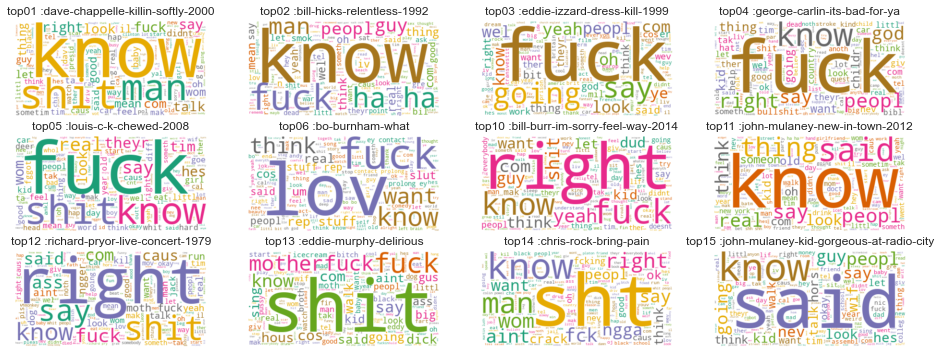

In [252]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = top_df['special'].to_list()

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(top_df.text[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

Most of them use S-word and F-word a lot (Chris Rock's transcipt replaced i with !, so in preprocessing it was removed). John Mulaney's two specials look less so.

In [253]:
data[special]

aaaaaaaaaaal        0
aaaaaaaahhhhhhh     0
aaaaah              0
aaaaahhhhhhh        0
aaaaauuugghhhhhh    0
                   ..
zon                 0
zoo                 2
zoom                0
zwe                 0
zyrtec              1
Name: top15 :john-mulaney-kid-gorgeous-at-radio-city, Length: 5186, dtype: int64

## The speed of speech and lexicon usage

In [254]:

unique_list = []
for special in data.columns:
    uniques = data[special].ne(0).sum()
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['special', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

special  unique_words
10                    top14 :chris-rock-bring-pain           827
0         top01 :dave-chappelle-killin-softly-2000           841
8           top12 :richard-pryor-live-concert-1979           848
9                    top13 :eddie-murphy-delirious           881
4                     top05 :louis-c-k-chewed-2008           895
5                           top06 :bo-burnham-what          1062
1                top02 :bill-hicks-relentless-1992          1086
7             top11 :john-mulaney-new-in-town-2012          1136
11  top15 :john-mulaney-kid-gorgeous-at-radio-city          1200
3              top04 :george-carlin-its-bad-for-ya          1219
6          top10 :bill-burr-im-sorry-feel-way-2014          1310
2              top03 :eddie-izzard-dress-kill-1999          1909

In [255]:
total_list = []
for special in data.columns:
    totals = sum(data[special])
    total_list.append(totals)

# Comedy special run times from IMDB (in minutes)
run_times = [57, 75, 115, 69, 61, 60, 80, 60, 78, 70, 80, 64]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

special  unique_words  total_words  \
1                top02 :bill-hicks-relentless-1992          1086         3476   
10                    top14 :chris-rock-bring-pain           827         3833   
5                           top06 :bo-burnham-what          1062         3209   
9                    top13 :eddie-murphy-delirious           881         3895   
4                     top05 :louis-c-k-chewed-2008           895         3486   
2              top03 :eddie-izzard-dress-kill-1999          1909         6644   
8           top12 :richard-pryor-live-concert-1979           848         4614   
11  top15 :john-mulaney-kid-gorgeous-at-radio-city          1200         3888   
0         top01 :dave-chappelle-killin-softly-2000           841         3548   
3              top04 :george-carlin-its-bad-for-ya          1219         4539   
6          top10 :bill-burr-im-sorry-feel-way-2014          1310         5500   
7             top11 :john-mulaney-new-in-town-2012          1136         4251   

    run_times  words_per_minute  
1          75         46.346667  
10         80         47.912500  
5          60         53.483333  
9          70         55.642857  
4          61         57.147541  
2         115         57.773913  
8          78         59.153846  
11         64         60.750000  
0          57         62.245614  
3          69         65.782609  
6          80         68.750000  
7          60         70.850000

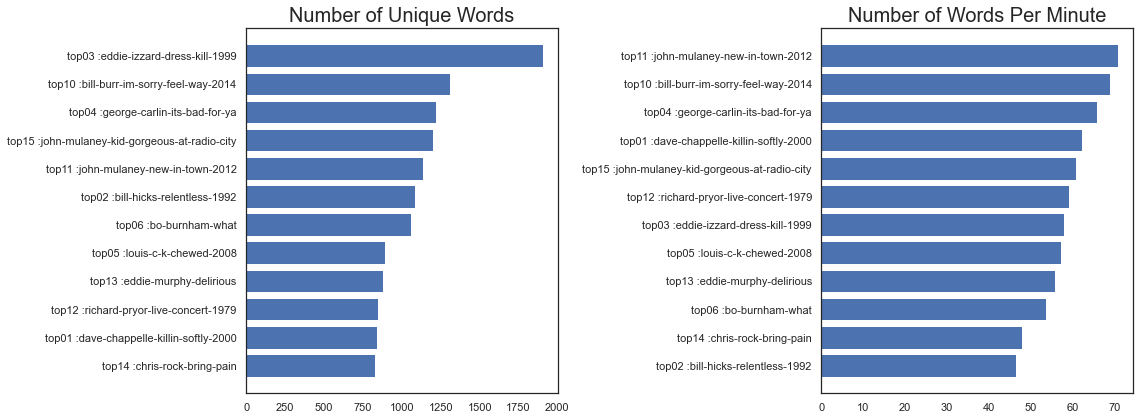

In [256]:
import numpy as np

y_pos = np.arange(len(data_words)) # Return evenly spaced values within a given interval. Stop at len(data_words)
plt.subplot(1, 2, 1) # plt.subplot (nrows, ncols, index)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.special)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.special)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

# Findings

Eddie Izzard used more unique words, but his runtime is also almost two times more. Bill Burr, George Carlin and John Mulaney used more unique words

Bill Hicks talks slow, while John Mulaney talks faster in New in Town.

In [257]:
Counter(list_of_words).most_common()


[('lik', 12),
 ('know', 12),
 ('im', 12),
 ('dont', 12),
 ('peopl', 12),
 ('say', 11),
 ('yo', 10),
 ('fuck', 9),
 ('got', 9),
 ('gon', 9),
 ('right', 8),
 ('ev', 8),
 ('com', 8),
 ('na', 8),
 ('thing', 8),
 ('think', 8),
 ('look', 7),
 ('want', 7),
 ('man', 6),
 ('yeah', 6),
 ('said', 6),
 ('kid', 6),
 ('shit', 5),
 ('guy', 5),
 ('oh', 5),
 ('good', 5),
 ('let', 5),
 ('cau', 5),
 ('real', 5),
 ('going', 5),
 ('tim', 4),
 ('year', 4),
 ('talk', 3),
 ('wom', 3),
 ('wel', 3),
 ('theyr', 3),
 ('old', 3),
 ('tak', 3),
 ('hes', 3),
 ('littl', 3),
 ('day', 3),
 ('nev', 3),
 ('walk', 3),
 ('aint', 3),
 ('black', 2),
 ('mean', 2),
 ('didnt', 2),
 ('new', 2),
 ('kil', 2),
 ('god', 2),
 ('big', 2),
 ('car', 2),
 ('eat', 2),
 ('cos', 2),
 ('ass', 2),
 ('moth', 2),
 ('whit', 1),
 ('feel', 1),
 ('il', 1),
 ('ha', 1),
 ('iv', 1),
 ('smok', 1),
 ('bil', 1),
 ('sex', 1),
 ('ye', 1),
 ('bit', 1),
 ('la', 1),
 ('er', 1),
 ('dea', 1),
 ('childr', 1),
 ('bullshit', 1),
 ('tel', 1),
 ('hat', 1),
 ('ta', 1)

In [258]:
data_bad_words = data.transpose()[['fuck', 'fck', 'shit', 'sht']] #to include Chris Rock's transcript
data_profanity = pd.concat([data_bad_words.fuck + data_bad_words.fck, data_bad_words.shit + data_bad_words.sht], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity


f_word  s_word
special                                                       
top01 :dave-chappelle-killin-softly-2000            43      63
top02 :bill-hicks-relentless-1992                   76      14
top03 :eddie-izzard-dress-kill-1999                 88       2
top04 :george-carlin-its-bad-for-ya                112      22
top05 :louis-c-k-chewed-2008                        84      44
top06 :bo-burnham-what                              41       7
top10 :bill-burr-im-sorry-feel-way-2014            113      66
top11 :john-mulaney-new-in-town-2012                 8      13
top12 :richard-pryor-live-concert-1979             120     122
top13 :eddie-murphy-delirious                      106     146
top14 :chris-rock-bring-pain                        50     107
top15 :john-mulaney-kid-gorgeous-at-radio-city      14       8

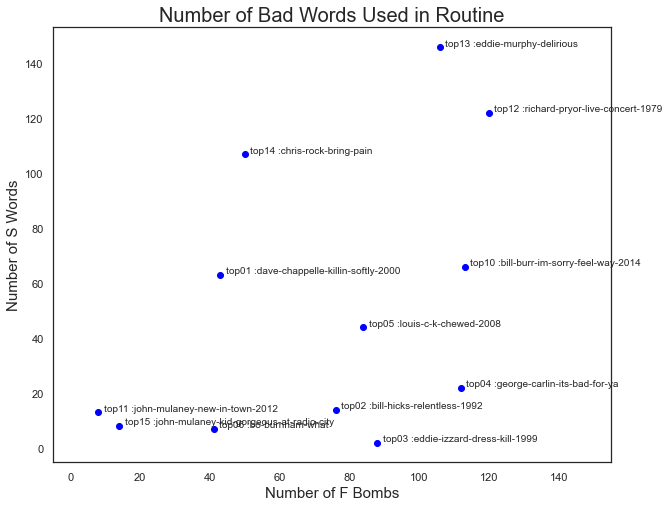

In [259]:
plt.rcParams['figure.figsize'] = [10, 8] 

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10) 
    plt.xlim(-5, 155)
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

The visualization again highlight the S-Word and F-Word usage of authors. John Mulaney's two works use them comparably less, while Eddie Murphy and Richard Pryor for example use both words a lot.

In [260]:
data_bad_words2 = data2.transpose()[['fuck', 'fck', 'shit', 'sht']] #to include Chris Rock's transcript
data_profanity2 = pd.concat([data_bad_words2.fuck + data_bad_words2.fck, data_bad_words2.shit + data_bad_words2.sht], axis=1)
data_profanity2.columns = ['f_word', 's_word']
data_profanity2

f_word  s_word
special                                                       
john-mulaney-snl-monologue-2020                      0       0
john-mulaney-snl-monologue-2018                      0       0
top15 :john-mulaney-kid-gorgeous-at-radio-city      14       8
top11 :john-mulaney-new-in-town-2012                 8      13
john-mulaney-comeback-kid-2015                       4       7
...                                                ...     ...
dave-chappelle-equanimity-2017                      38      47
dave-chappelle-worth-2004                           49      62
top01 :dave-chappelle-killin-softly-2000            43      63
dave-chappelle-deep-heart-texas-2017                31      58
dave-chappelle-age-spin-2017                        72      47

[85 rows x 2 columns]

#### The graph for the whole dataset

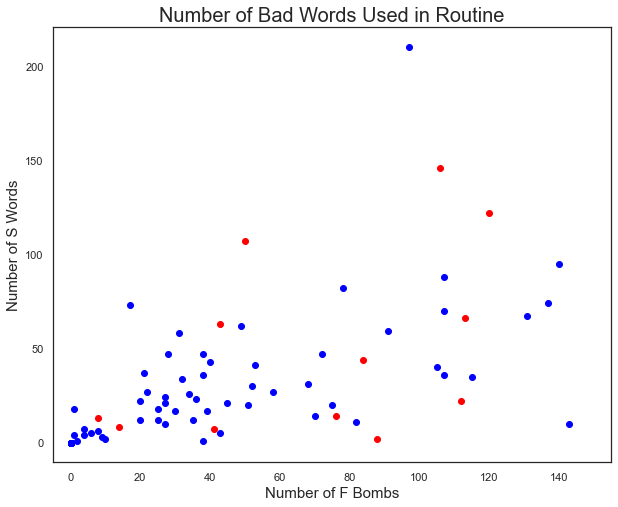

In [262]:
plt.rcParams['figure.figsize'] = [10, 8] 

for i, comedian in enumerate(data_profanity2.index):
    x = data_profanity2.f_word.loc[comedian]
    y = data_profanity2.s_word.loc[comedian]
    if comedian.startswith("top"):
        plt.scatter(x, y, color='red')
    else: 
        plt.scatter(x, y, color='blue')
    #plt.text(x+1.5, y+0.5, df['special'].to_list()[i], fontsize=10) 
    plt.xlim(-5, 155)
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

There is not a significant relationship between being in top15 and S-word and F-word usage.

In [263]:
top_df

special  \
special                                                                                          
top01 :dave-chappelle-killin-softly-2000              top01 :dave-chappelle-killin-softly-2000   
top02 :bill-hicks-relentless-1992                            top02 :bill-hicks-relentless-1992   
top03 :eddie-izzard-dress-kill-1999                        top03 :eddie-izzard-dress-kill-1999   
top04 :george-carlin-its-bad-for-ya                        top04 :george-carlin-its-bad-for-ya   
top05 :louis-c-k-chewed-2008                                      top05 :louis-c-k-chewed-2008   
top06 :bo-burnham-what                                                  top06 :bo-burnham-what   
top10 :bill-burr-im-sorry-feel-way-2014                top10 :bill-burr-im-sorry-feel-way-2014   
top11 :john-mulaney-new-in-town-2012                      top11 :john-mulaney-new-in-town-2012   
top12 :richard-pryor-live-concert-1979                  top12 :richard-pryor-live-concert-1979   
top13 :eddie-murphy-delirious                                    top13 :eddie-murphy-delirious   
top14 :chris-rock-bring-pain                                      top14 :chris-rock-bring-pain   
top15 :john-mulaney-kid-gorgeous-at-radio-city  top15 :john-mulaney-kid-gorgeous-at-radio-city   

                                                                                         text_raw  \
special                                                                                             
top01 :dave-chappelle-killin-softly-2000        wooo yall gone make me lose my mind up in here...   
top02 :bill-hicks-relentless-1992               recorded in  at the centaur theatre during the...   
top03 :eddie-izzard-dress-kill-1999             san francisco town city of gleaming spires peo...   
top04 :george-carlin-its-bad-for-ya             full transcript of its bad for ya final hbo st...   
top05 :louis-c-k-chewed-2008                    filmed at the berklee performance center in bo...   
top06 :bo-burnham-what                          bo what old macdonald had a farm e i e i o and...   
top10 :bill-burr-im-sorry-feel-way-2014          all right thank you thank you very much thank...   
top11 :john-mulaney-new-in-town-2012               new in town   john mulaneys new in town   h...   
top12 :richard-pryor-live-concert-1979          filmed in long beach california on december   ...   
top13 :eddie-murphy-delirious                   filmed on august   at dar constitution hall in...   
top14 :chris-rock-bring-pain                     live from the takoma theatre in washington dc...   
top15 :john-mulaney-kid-gorgeous-at-radio-city   welcome to radio city music hall its time any...   

                                                                                             text  
special                                                                                            
top01 :dave-chappelle-killin-softly-2000        wooo yal gon mak los mind yal gon mak throw ya...  
top02 :bill-hicks-relentless-1992               record centa the an laugh comedy fest mont can...  
top03 :eddie-izzard-dress-kill-1999             san francisco town city gleam spir peopl liv g...  
top04 :george-carlin-its-bad-for-ya             ful transcrib bad ya fin hbo standup comedy sp...  
top05 :louis-c-k-chewed-2008                    film berkl perform cent boston march hello alr...  
top06 :bo-burnham-what                          bo old macdonald farm e e farm pig e e snort o...  
top10 :bill-burr-im-sorry-feel-way-2014         right thank thank much thank thank thank what ...  
top11 :john-mulaney-new-in-town-2012            new town john mulaney new town hes spil mustar...  
top12 :richard-pryor-live-concert-1979          film long beach californ decemb richard pry th...  
top13 :eddie-murphy-delirious                   film august dar constitut hal washington dc la...  
top14 :chris-rock-bring-pain                    liv takom the washington dc ready said ready t...  

# Polarity and Subjectivity

It was also interesting to look at the Polarity and Subjectivity scores given by the TextBlob.

Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

In [264]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

# Apply a function along an axis of the DataFrame.
top_df['polarity'] = top_df['text_raw'].apply(pol)
top_df['subjectivity'] = top_df['text_raw'].apply(sub)
top_df

special  \
special                                                                                          
top01 :dave-chappelle-killin-softly-2000              top01 :dave-chappelle-killin-softly-2000   
top02 :bill-hicks-relentless-1992                            top02 :bill-hicks-relentless-1992   
top03 :eddie-izzard-dress-kill-1999                        top03 :eddie-izzard-dress-kill-1999   
top04 :george-carlin-its-bad-for-ya                        top04 :george-carlin-its-bad-for-ya   
top05 :louis-c-k-chewed-2008                                      top05 :louis-c-k-chewed-2008   
top06 :bo-burnham-what                                                  top06 :bo-burnham-what   
top10 :bill-burr-im-sorry-feel-way-2014                top10 :bill-burr-im-sorry-feel-way-2014   
top11 :john-mulaney-new-in-town-2012                      top11 :john-mulaney-new-in-town-2012   
top12 :richard-pryor-live-concert-1979                  top12 :richard-pryor-live-concert-1979   
top13 :eddie-murphy-delirious                                    top13 :eddie-murphy-delirious   
top14 :chris-rock-bring-pain                                      top14 :chris-rock-bring-pain   
top15 :john-mulaney-kid-gorgeous-at-radio-city  top15 :john-mulaney-kid-gorgeous-at-radio-city   

                                                                                         text_raw  \
special                                                                                             
top01 :dave-chappelle-killin-softly-2000        wooo yall gone make me lose my mind up in here...   
top02 :bill-hicks-relentless-1992               recorded in  at the centaur theatre during the...   
top03 :eddie-izzard-dress-kill-1999             san francisco town city of gleaming spires peo...   
top04 :george-carlin-its-bad-for-ya             full transcript of its bad for ya final hbo st...   
top05 :louis-c-k-chewed-2008                    filmed at the berklee performance center in bo...   
top06 :bo-burnham-what                          bo what old macdonald had a farm e i e i o and...   
top10 :bill-burr-im-sorry-feel-way-2014          all right thank you thank you very much thank...   
top11 :john-mulaney-new-in-town-2012               new in town   john mulaneys new in town   h...   
top12 :richard-pryor-live-concert-1979          filmed in long beach california on december   ...   
top13 :eddie-murphy-delirious                   filmed on august   at dar constitution hall in...   
top14 :chris-rock-bring-pain                     live from the takoma theatre in washington dc...   
top15 :john-mulaney-kid-gorgeous-at-radio-city   welcome to radio city music hall its time any...   

                                                                                             text  \
special                                                                                             
top01 :dave-chappelle-killin-softly-2000        wooo yal gon mak los mind yal gon mak throw ya...   
top02 :bill-hicks-relentless-1992               record centa the an laugh comedy fest mont can...   
top03 :eddie-izzard-dress-kill-1999             san francisco town city gleam spir peopl liv g...   
top04 :george-carlin-its-bad-for-ya             ful transcrib bad ya fin hbo standup comedy sp...   
top05 :louis-c-k-chewed-2008                    film berkl perform cent boston march hello alr...   
top06 :bo-burnham-what                          bo old macdonald farm e e farm pig e e snort o...   
top10 :bill-burr-im-sorry-feel-way-2014         right thank thank much thank thank thank what ...   
top11 :john-mulaney-new-in-town-2012            new town john mulaney new town hes spil mustar...   
top12 :richard-pryor-live-concert-1979          film long beach californ decemb richard pry th...   
top13 :eddie-murphy-delirious                   film august dar constitut hal washington dc la...   
top14 :chris-rock-bring-pain                    liv takom the washington dc ready said 

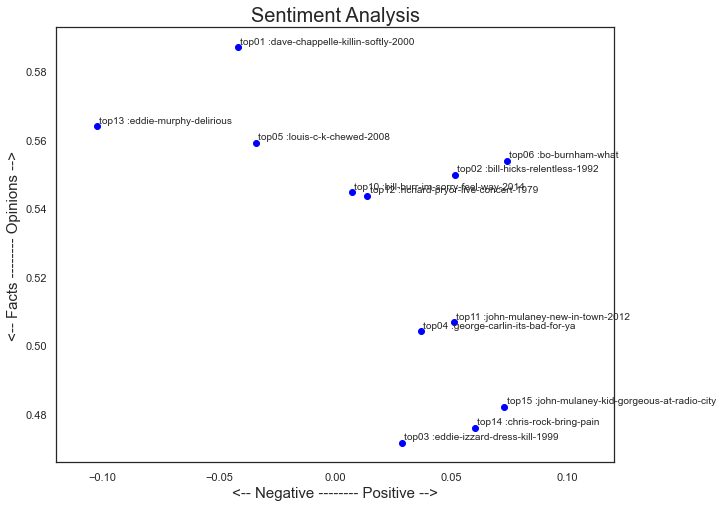

In [265]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8] 

for index, special in enumerate(top_df.index):
    x = top_df.polarity.loc[special]
    y = top_df.subjectivity.loc[special]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, top_df['special'][index], fontsize=10)
    plt.xlim(-.12, .12) 

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

y-axis - Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.
The subjectivity scores of the authors were between 0.47 (Eddie Izzard) and 0.58 (Dave Chappelle).

x-axis - Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
The authors were far from extreme values (as this should be funny): the most negative in this list was Eddie Murphy (-0.1), while the most positive was Bo Burnham and John Mulaney with values around 0.072 (Bo Burnham was more subjective).


#### For the whole dataset:

In [266]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

# Apply a function along an axis of the DataFrame.
df['polarity'] = df['text_raw'].apply(pol)
df['subjectivity'] = df['text_raw'].apply(sub)
df.head()

special  \
special                                                                                          
john-mulaney-snl-monologue-2020                                john-mulaney-snl-monologue-2020   
john-mulaney-snl-monologue-2018                                john-mulaney-snl-monologue-2018   
top15 :john-mulaney-kid-gorgeous-at-radio-city  top15 :john-mulaney-kid-gorgeous-at-radio-city   
top11 :john-mulaney-new-in-town-2012                      top11 :john-mulaney-new-in-town-2012   
john-mulaney-comeback-kid-2015                                  john-mulaney-comeback-kid-2015   

                                                                                         text_raw  \
special                                                                                             
john-mulaney-snl-monologue-2020                 original air date october   john mulaney talks...   
john-mulaney-snl-monologue-2018                 original air date april   host john mulaney di...   
top15 :john-mulaney-kid-gorgeous-at-radio-city   welcome to radio city music hall its time any...   
top11 :john-mulaney-new-in-town-2012               new in town   john mulaneys new in town   h...   
john-mulaney-comeback-kid-2015                  armed with boyish charm and a sharp wit the fo...   

                                                                                             text  \
special                                                                                             
john-mulaney-snl-monologue-2020                 origin air dat octob john mulaney talk new yor...   
john-mulaney-snl-monologue-2018                 origin air dat april host john mulaney discuss...   
top15 :john-mulaney-kid-gorgeous-at-radio-city  welcom radio city mus hal tim quest walk good ...   
top11 :john-mulaney-new-in-town-2012            new town john mulaney new town hes spil mustar...   
john-mulaney-comeback-kid-2015                  arm boy charm sharp wit form snl writ john mul...   

                                                polarity  subjectivity  
special                                                                 
john-mulaney-snl-monologue-2020                 0.167803      0.535047  
john-mulaney-snl-monologue-2018                 0.127546      0.448063  
top15 :john-mulaney-kid-gorgeous-at-radio-city  0.072742      0.482134  
top11 :john-mulaney-new-in-town-2012            0.051062      0.506745  
john-mulaney-comeback-kid-2015                  0.074283      0.490400

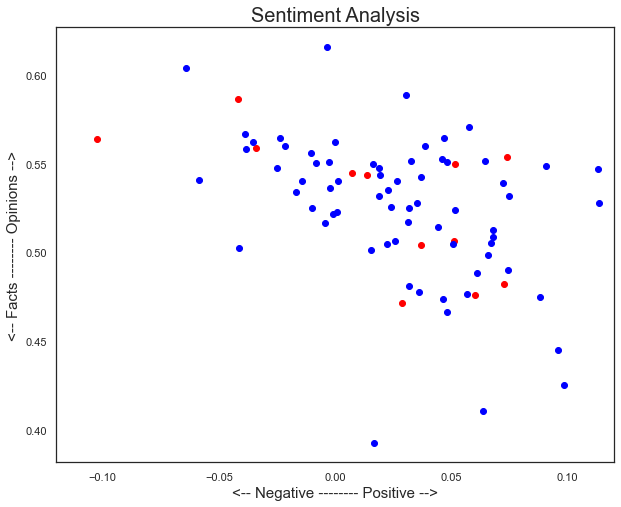

In [268]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8] 

for index, special in enumerate(df.index):
    x = df.polarity.loc[special]
    y = df.subjectivity.loc[special]
    if special.startswith("top"):
        plt.scatter(x, y, color='red')
    else: 
        plt.scatter(x, y, color='blue')
    #plt.text(x+.001, y+.001, top_df['special'][index], fontsize=10)
    plt.xlim(-.12, .12) 

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

The whole dataset is showing similar pattern in terms of subjectivity and polarity. There is not a significant relationship between being in top15 and subjectivity and polarity values.

### Sentiment over time

This technique divided the text on equal parts to see the change of the sentiment over time, as comedy usually makes the punchlines after some introductory material 

In [107]:
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    length = len(text) # Calculate length of text
    size = math.floor(length / n) # Calculate size of each chunk of text 
    # Calculate the starting points of each chunk of text
    start = np.arange(0, length, size) # numpy.arange([start, ]stop, [step]) ...Return evenly spaced values within a given interval.
    
    # Pull out equally sized pieces of text and put it into a list. Return a list with chunks of text
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [108]:
list_pieces = []
for t in top_df.text_raw:
    split = split_text(t)
    list_pieces.append(split)

In [109]:
list_pieces

[['wooo yall gone make me lose my mind up in here up in here yall gone make me throw her out up in here up in here yall gone make me act a fool up in here up in here yall gone make me lose my cool up in here up in here from the historic lincoln theater in washington dc dave chappelle thank you thank you thank you oh yeah oh yeah all right no really boy well its good to come home boy i swear i know man its been a while its been a while hey dc is different ive been gone man it took me years to be able to do the show boy dc has changed its different now theres a lot of white people walking around isnt there i mean i left dc in the  it was not like this in the  when crack was going on remember when crack was going on white people would be looking at dc from virginia with binoculars boy that looks dangerous not yet new white people you cant scare these white people i tried you roll up on em boo what the hell is wrong with you those days are over im glad that were doing a show here by howard

In [110]:
len(list_pieces)

12

In [111]:
len(list_pieces[11])

10

In [112]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[-0.03799647168549607,
  -0.10003034003034005,
  -0.16370913443281856,
  -0.1611041083099906,
  -0.07441599839140825,
  0.05881904761904757,
  -0.019882783882783882,
  -0.0190546218487395,
  0.15971912202380953,
  -0.001221655328798197],
 [0.08156908665105388,
  0.02291895500850723,
  0.06844336219336222,
  -0.038021822232348575,
  -0.048256373256373254,
  0.17310694769711168,
  0.0628054353054353,
  0.1287134176587302,
  -0.07629530292573772,
  0.12056435137895806],
 [0.0076650985069352485,
  -0.011662441662441658,
  0.04377759598232039,
  0.07313779804851232,
  0.01432349468713104,
  0.028852228852228854,
  0.07253723300019597,
  -8.664200812961516e-05,
  0.09391684704184704,
  -0.007861613024656511],
 [-0.01081256819061696,
  0.07760704641892759,
  0.09730503082775804,
  -0.0022277992277992048,
  -0.02611977741288083,
  0.0014521947586463653,
  0.11286261631089219,
  0.15660130718954246,
  -0.03746865324535227,
  0.0405985758789497],
 [0.03811633281972265,
  -0.0038827838827838715,

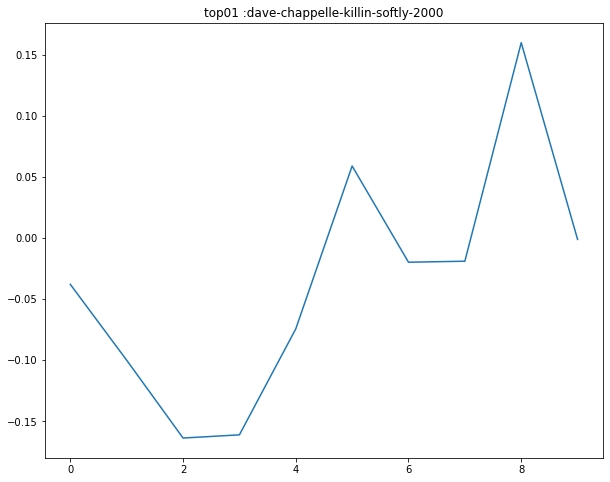

In [113]:
plt.plot(polarity_transcript[0])
plt.title(top_df['special'][0])
plt.show()

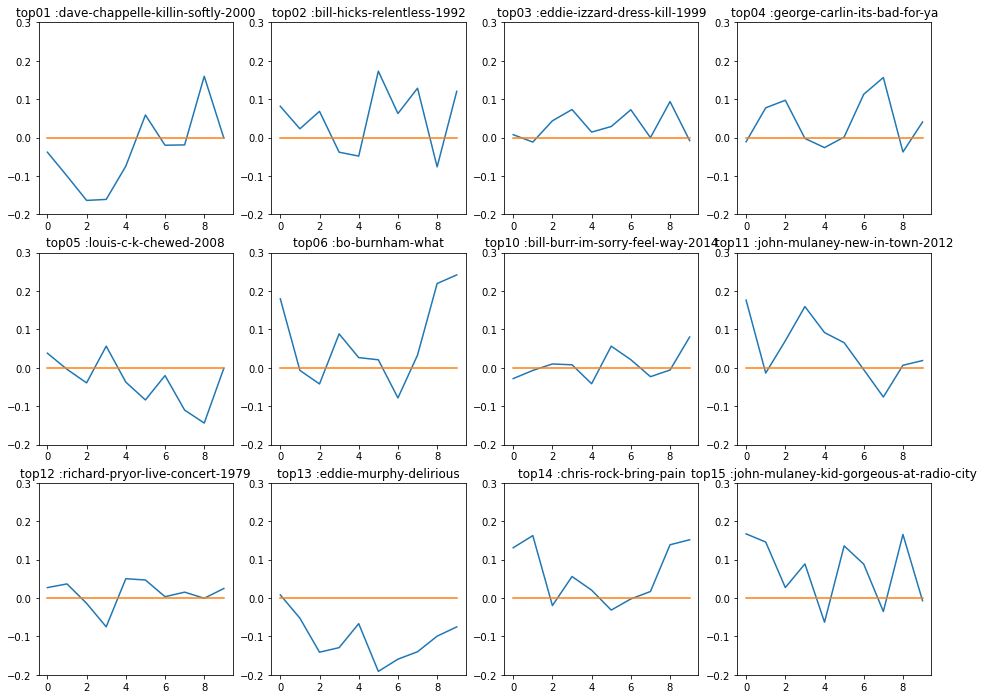

In [114]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, special in enumerate(top_df.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(top_df['special'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

This is the polarity scores of stand-up scripts over ten equal divisions. We can see that Dave Chappelle started with more negative score and went more positive towards the end. Bill Hicks was fluctuating around the score of 0.1; Eddie Izzard around 0.05; George Carlin had an interesting scructure of his comedy with clear defined two gradual peaks. Louis C K was going negative over time. Bo Burnham has big jumps in polarity score over time. Bill Burr was more neutral. John Mulaney's 'New in Town' started more positive and went more neutral towards the end. Richard Pryor was also more or less neutral. Eddie Murphy's material was negative, fluctuating around 0.1. Chris Rock started and ended positively and was more neutral in the middle. John Mulaney's 'Kid Gorgeous at Radio City' was fluctuating between 0.2 and -0.05.

## Topic Modelling

In [115]:
import os
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize
import warnings
from sklearn.cluster import KMeans




from tqdm.notebook import tqdm

warnings.filterwarnings("ignore")
tqdm.pandas()

In [116]:
def preprocessing_text(text):
    words = word_tokenize(text.lower())
    tokens = [word for word in words if word not in string.punctuation]
    tokens = [token for token in tokens if token not in stop_words]
    preprocessed_text = " ".join(tokens)
    return preprocessed_text

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(preprocessor = preprocessing_text)
dtm_tfidf = vectorizer.fit_transform(top_df["text_raw"])
df_tfidf = pd.DataFrame(dtm_tfidf.toarray(), columns=vectorizer.get_feature_names())

In [118]:
from gensim import models
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
import re
import numpy as np
from gensim import corpora

In [119]:
tokenizer = RegexpTokenizer(r'\w+')
def prepare_text_for_lda(text):
    text= re.sub(r'\d', '', text)
    tokens = tokenizer.tokenize(text.lower())
    return tokens

In [120]:
top_df['tokens'] = top_df['text_raw'].apply(lambda x: prepare_text_for_lda(x))

In [121]:
top_df.head()

special  \
special                                                                              
top01 :dave-chappelle-killin-softly-2000  top01 :dave-chappelle-killin-softly-2000   
top02 :bill-hicks-relentless-1992                top02 :bill-hicks-relentless-1992   
top03 :eddie-izzard-dress-kill-1999            top03 :eddie-izzard-dress-kill-1999   
top04 :george-carlin-its-bad-for-ya            top04 :george-carlin-its-bad-for-ya   
top05 :louis-c-k-chewed-2008                          top05 :louis-c-k-chewed-2008   

                                                                                   text_raw  \
special                                                                                       
top01 :dave-chappelle-killin-softly-2000  wooo yall gone make me lose my mind up in here...   
top02 :bill-hicks-relentless-1992         recorded in  at the centaur theatre during the...   
top03 :eddie-izzard-dress-kill-1999       san francisco town city of gleaming spires peo...   
top04 :george-carlin-its-bad-for-ya       full transcript of its bad for ya final hbo st...   
top05 :louis-c-k-chewed-2008              filmed at the berklee performance center in bo...   

                                                                                       text  \
special                                                                                       
top01 :dave-chappelle-killin-softly-2000  wooo yal gon mak los mind yal gon mak throw ya...   
top02 :bill-hicks-relentless-1992         record centa the an laugh comedy fest mont can...   
top03 :eddie-izzard-dress-kill-1999       san francisco town city gleam spir peopl liv g...   
top04 :george-carlin-its-bad-for-ya       ful transcrib bad ya fin hbo standup comedy sp...   
top05 :louis-c-k-chewed-2008              film berkl perform cent boston march hello alr...   

                                          polarity  subjectivity  \
special                                                            
top01 :dave-chappelle-killin-softly-2000 -0.041813      0.586981   
top02 :bill-hicks-relentless-1992         0.051391      0.549827   
top03 :eddie-izzard-dress-kill-1999       0.028744      0.471755   
top04 :george-carlin-its-bad-for-ya       0.036940      0.504160   
top05 :louis-c-k-chewed-2008             -0.034030      0.559069   

                                                                                     tokens  
special                                                                                      
top01 :dave-chappelle-killin-softly-2000  [wooo, yall, gone, make, me, lose, my, mind, u...  
top02 :bill-hicks-relentless-1992         [recorded, in, at, the, centaur, theatre, duri...  
top03 :eddie-izzard-dress-kill-1999       [san, francisco, town, city, of, gleaming, spi...  
top04 :george-carlin-its-bad-for-ya       [full, transcript, of, its, bad, for, ya, fina...  
top05 :louis-c-k-chewed-2008              [filmed, at, the, berklee, performance, center...

In [122]:
from nltk.corpus import wordnet
# original example can be found here https://stackoverflow.com/a/15590384

def wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [123]:
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma(element):
    for word, pos in pos_tag(element.split()):
        result_pos=wordnet_pos(pos)
        if result_pos != None:
            return WordNetLemmatizer().lemmatize(word, result_pos)
        else:
            return word

In [124]:
def get_lemma(element):
    for word, pos in pos_tag(element.split()):
        result_pos = wordnet_pos(pos)
        if result_pos != None:
            return WordNetLemmatizer().lemmatize(word, result_pos)
        else:
            return word

def convert(list_element):
    tokens = [get_lemma(token) for token in list_element]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [token for token in tokens if len(token) > 3]
    return tokens

In [125]:
from tqdm.notebook import tqdm
tqdm.pandas()

top_df['tokens'] = top_df['tokens'].progress_apply(lambda sentences: convert(sentences))

  0%|          | 0/12 [00:00<?, ?it/s]

In [126]:
top_df['tokens'].to_pickle("lda_prep_topdf.pkl")

In [127]:
top_df["tokens"] = pd.read_pickle("lda_prep_topdf.pkl")

In [128]:
def get_LDA_model(top_df, num_topics=7):

    dictionary_LDA = corpora.Dictionary(top_df["tokens"].tolist())
    dictionary_LDA.filter_extremes(no_below=3)

    corpus = [dictionary_LDA.doc2bow(tok) for tok in top_df["tokens"].tolist()]

    np.random.seed(123)

    lda_model = models.LdaModel(
        corpus, num_topics=num_topics, id2word=dictionary_LDA, passes=4
    )
    return lda_model, corpus, dictionary_LDA

In [129]:
lda_model, corpus, dictionary_LDA = get_LDA_model(top_df,7)

In [130]:
num_topics = 7
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic + "\n")

0: 0.021*"alright" + 0.018*"sexual" + 0.017*"drug" + 0.015*"beach" + 0.012*"news" + 0.012*"satan" + 0.009*"smoke" + 0.009*"laid" + 0.008*"heaven" + 0.008*"honey" + 0.008*"guard" + 0.007*"issue" + 0.007*"christian" + 0.007*"cross" + 0.007*"quit" + 0.006*"pretend" + 0.006*"television" + 0.006*"bush" + 0.006*"planet" + 0.006*"weapon"

1: 0.017*"contact" + 0.015*"college" + 0.013*"comedy" + 0.013*"brain" + 0.012*"bread" + 0.009*"hospital" + 0.009*"stage" + 0.009*"smart" + 0.009*"deep" + 0.007*"adult" + 0.007*"monkey" + 0.007*"water" + 0.006*"magic" + 0.006*"meant" + 0.006*"goddamn" + 0.006*"alright" + 0.006*"wheres" + 0.006*"idiot" + 0.006*"card" + 0.005*"church"

2: 0.016*"ankle" + 0.015*"outta" + 0.014*"ngger" + 0.013*"doctor" + 0.012*"brief" + 0.011*"awesome" + 0.011*"difference" + 0.009*"enjoy" + 0.009*"chicken" + 0.009*"wild" + 0.009*"tiny" + 0.009*"awful" + 0.009*"nword" + 0.008*"meal" + 0.008*"coffee" + 0.006*"honey" + 0.006*"nose" + 0.006*"kinda" + 0.006*"upset" + 0.006*"secret"

3

It is hard to distinguish a clear defined topic from this analysis. It is probably because there was not enough data and comedians mostly talk about situational comedy and change topics quickly. Nevertheless, topic 0 seems to be mostly about 
sex, drugs, smoking and discusses those things in relation to christianity, satan and heaven. The heatmap shows that it is Bill Hicks' 'Relentless'.
Topic 1 seems to cover a mixture of things, probably because it tried to incorporate more than one document. The heatmap shows that it is Bo Burnham's 'What' and John Mulaney's 'Kid Gorgeous at Radio City'. 'contact' has the highest weight, but it was just because Bo Burnham's 'What' was repeacting 'prolonged eye contact' 21 times. 
Topic 2 includes document 'Luois C K Chewed Up' which is covers the situation with ankle x-ray, so there is doctor also in this topic.
Topic 3 is probably about drugs and jail. It includes documents 'dave-chappelle-killin-softly' and 'chris-rock-bring-pain'.
Topic 4 seems to be about religion. It includes documents 'bill-burr-im-sorry-feel-way-2014' and 'eddie-izzard-dress-kill-1999'
Topic 5 seems to be simply mixture of harsh vocabulary, so I would not think of it as topic of documents shown in the heatmap.
Topic 6 seems to be about bullshit and it is mostly george-carlin document contribution. Other words are about situational comedy of eddie-murphy and other george-carlin words.

In [131]:
from gensim.models import Phrases
documents = top_df.text_raw

sentence_stream = [doc.split(" ") for doc in documents]
bigram = Phrases(sentence_stream, min_count=1, threshold=2)

In [148]:
topics = [lda_model[corpus[i]] for i in range(12)]

def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res


In [149]:
document_topic = pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]).reset_index(drop=True).fillna(0)

In [150]:
document_topic.to_pickle("document_topic_standup.pkl")

In [151]:
document_topic

0         1         2         3         4         5         6
0   0.000000  0.000000  0.000000  0.998061  0.000000  0.000000  0.000000
1   0.998293  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
2   0.000000  0.000000  0.000000  0.000000  0.387513  0.611767  0.000000
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.998778
4   0.000000  0.000000  0.998097  0.000000  0.000000  0.000000  0.000000
5   0.000000  0.998301  0.000000  0.000000  0.000000  0.000000  0.000000
6   0.000000  0.000000  0.000000  0.000000  0.994021  0.000000  0.000000
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.998473  0.000000
8   0.000000  0.000000  0.000000  0.000000  0.000000  0.998187  0.000000
9   0.000000  0.000000  0.000000  0.085052  0.000000  0.000000  0.913446
10  0.000000  0.000000  0.000000  0.998352  0.000000  0.000000  0.000000
11  0.000000  0.998503  0.000000  0.000000  0.000000  0.000000  0.000000

<AxesSubplot:>

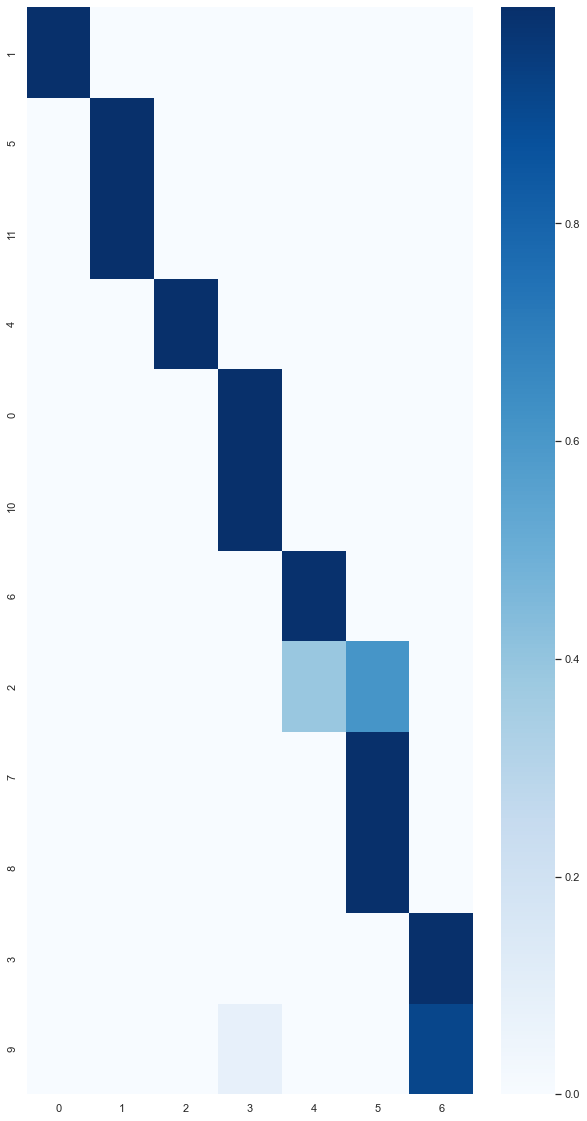

In [152]:
##Looking at the distribution of topics in all documents
import seaborn as sns
sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index], cmap="Blues")

<AxesSubplot:>

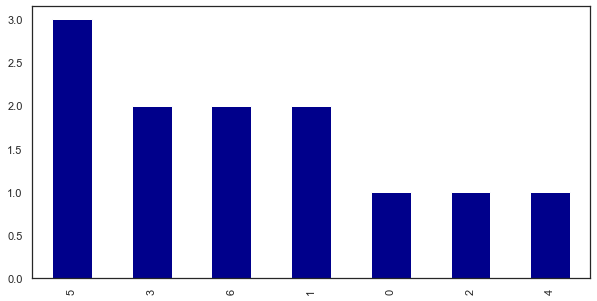

In [153]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("white") 
document_topic.idxmax(axis=1).value_counts().plot.bar(color='darkblue')

As expected topic 5, which was the mixture of harsh vocabulary has the highest weight.

In [138]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.display(vis)

**The above diagram consists of two parts, the intertopic distance map on the left and the bar chart on the right. The area of the topic circles is proportional to the number of words belonging to each topic in the dictionary. Topics 1,3,4 have intersections and topic 2 is closer to them, while topic 5, 6, 7 are more isolated**

Text(0, 0.5, 'WCSS')

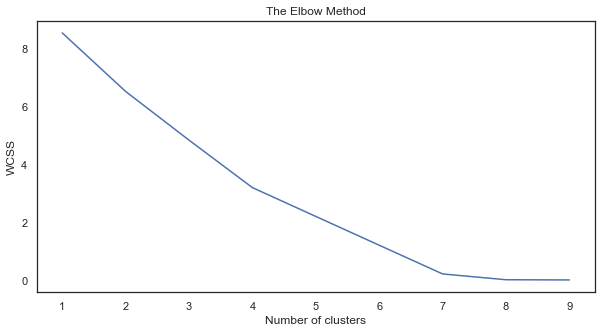

In [139]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123456)
    kmeans.fit(document_topic)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


## Topic modelling for the whole dataset

I thought that more documents will perform better topic modelling

In [140]:
dtm_tfidf2 = vectorizer.fit_transform(df["text_raw"])
df_tfidf2 = pd.DataFrame(dtm_tfidf2.toarray(), columns=vectorizer.get_feature_names())

In [141]:
df['tokens'] = df['text_raw'].apply(lambda x: prepare_text_for_lda(x))

In [142]:
df['tokens'] = df['tokens'].progress_apply(lambda sentences: convert(sentences))

  0%|          | 0/85 [00:00<?, ?it/s]

In [154]:
def get_LDA_model(df, num_topics=7):

    dictionary_LDA = corpora.Dictionary(df["tokens"].tolist())
    dictionary_LDA.filter_extremes(no_below=3)

    corpus = [dictionary_LDA.doc2bow(tok) for tok in df["tokens"].tolist()]

    np.random.seed(123)

    lda_model = models.LdaModel(
        corpus, num_topics=num_topics, id2word=dictionary_LDA, passes=4
    )
    return lda_model, corpus, dictionary_LDA

In [155]:
lda_model, corpus, dictionary_LDA = get_LDA_model(df,7)

In [156]:
num_topics = 7
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic + "\n")

0: 0.005*"trans" + 0.005*"yall" + 0.005*"comedy" + 0.004*"michael" + 0.003*"eddie" + 0.003*"married" + 0.003*"song" + 0.003*"chappelle" + 0.003*"damn" + 0.003*"million" + 0.003*"single" + 0.002*"fuckin" + 0.002*"community" + 0.002*"audience" + 0.002*"comedian" + 0.002*"club" + 0.002*"rule" + 0.002*"dance" + 0.002*"drug" + 0.002*"music"

1: 0.033*"fcking" + 0.007*"drug" + 0.005*"crack" + 0.004*"nggas" + 0.004*"tire" + 0.004*"fcked" + 0.004*"robot" + 0.004*"ngga" + 0.003*"president" + 0.003*"jail" + 0.003*"sell" + 0.003*"alright" + 0.003*"prolife" + 0.002*"cheat" + 0.002*"vote" + 0.002*"chicken" + 0.002*"control" + 0.002*"fetus" + 0.002*"king" + 0.002*"music"

2: 0.018*"fuckin" + 0.006*"goddamn" + 0.005*"banana" + 0.005*"asshole" + 0.005*"married" + 0.004*"nothin" + 0.003*"awesome" + 0.003*"dave" + 0.003*"yall" + 0.003*"football" + 0.003*"girlfriend" + 0.003*"rich" + 0.003*"talkin" + 0.003*"wash" + 0.002*"shirt" + 0.002*"fcking" + 0.002*"somethin" + 0.002*"damn" + 0.002*"till" + 0.002*"w

Topic 1 is again about drugs. Topic 3 is about public figures (president). Topic 5 seems to be about horses and sport. Topics 0,2,4,6 are indistinguishable. Unfortunately, more documents did not make the algorithm perform better in topic modelling.

In [157]:
documents2 = df.text_raw

sentence_stream2 = [doc.split(" ") for doc in documents2]
bigram2 = Phrases(sentence_stream2, min_count=1, threshold=2)

In [164]:
topics2 = [lda_model[corpus[i]] for i in range(85)]

def topics_document_to_dataframe2(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res


In [166]:
document_topic2 = pd.concat([topics_document_to_dataframe2(topics_document, num_topics=num_topics) for topics_document in topics2]).reset_index(drop=True).fillna(0)

<AxesSubplot:>

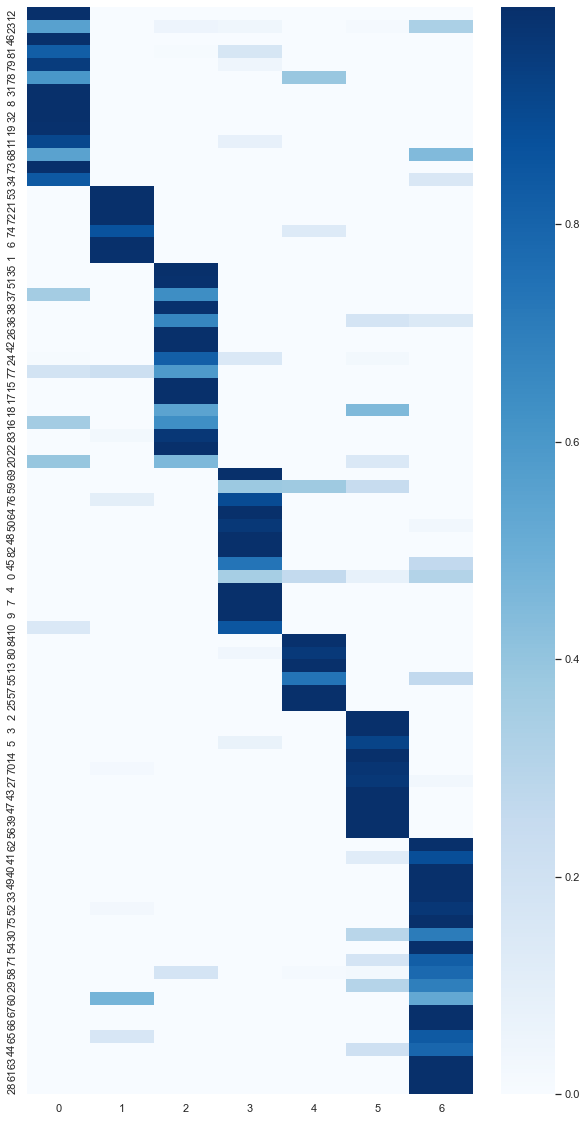

In [167]:
##Looking at the distribution of topics in all documents
import seaborn as sns
sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic2.loc[document_topic2.idxmax(axis=1).sort_values().index], cmap="Blues")

<AxesSubplot:>

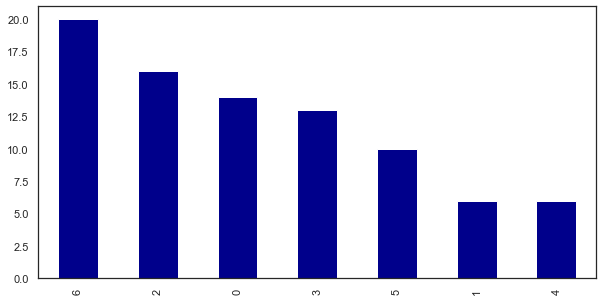

In [168]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("white") 
document_topic2.idxmax(axis=1).value_counts().plot.bar(color='darkblue')

In [169]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis2 = gensimvis.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.display(vis2)

Text(0, 0.5, 'WCSS')

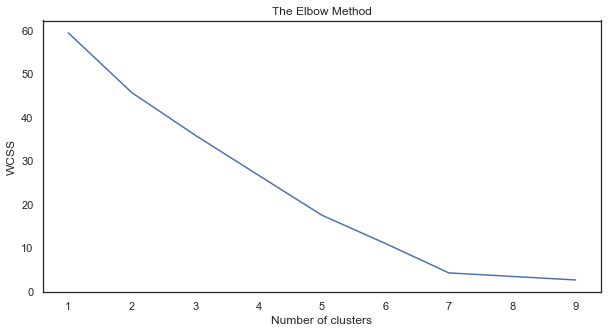

In [170]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123456)
    kmeans.fit(document_topic2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


We were correct in making it seven clusters.